In [1]:
import pandas
from scipy.io import arff
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
from dl85 import DL85Predictor
from dl85 import DL85Classifier
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import utils
import graphviz
import multiprocessing
from concurrent.futures import ThreadPoolExecutor
import ast

In [2]:
pd.set_option('max_columns', None)
FILE_NAME = "census_income"

data = arff.loadarff('../datasets2/census_income.arff')
df = pd.DataFrame(data[0])
str_df = df.select_dtypes([np.object])
str_df = str_df.stack().str.decode('utf-8').unstack()
for col in str_df:
    df[col] = str_df[col]
df

/tmp/ipykernel_15450/3397403187.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  str_df = df.select_dtypes([np.object])


,sex,workclass,education,education-num,marital-status,occupation,relationship,race,age,capital-gain,capital-loss,hours-per-week,native-country,income_class
0,Male,Private,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,25.0,0.0,0.0,40.0,United-States,<=50K
1,Male,Private,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,38.0,0.0,0.0,50.0,United-States,<=50K
2,Male,Local-gov,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,28.0,0.0,0.0,40.0,United-States,>50K
3,Male,Private,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,44.0,7688.0,0.0,40.0,United-States,>50K
4,Female,?,Some-college,10.0,Never-married,?,Own-child,White,18.0,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,Female,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,39.0,0.0,0.0,36.0,United-States,<=50K
16277,Male,?,HS-grad,9.0,Widowed,?,Other-relative,Black,64.0,0.0,0.0,40.0,United-States,<=50K
16278,Male,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,38.0,0.0,0.0,50.0,United-States,<=50K
16279,Male,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,44.0,5455.0,0.0,40.0,United-States,<=50K


In [3]:
for i in range(0,len(df)):
    if str(df.at[i, "sex"]) == "Male":
        df.at[i, "sex"] = 0
    elif str(df.at[i, "sex"]) == "Female":
        df.at[i, "sex"] = 1

    if str(df.at[i, "income_class"]) == "<=50K":
        df.at[i, "income_class"] = 0
    elif str(df.at[i, "income_class"]) == ">50K":
        df.at[i, "income_class"] = 1

for col in df.columns:
    df = df[ df[col] != "?" ]

col = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']
df = df.drop(['education-num', 'age', 'capital-gain', 'capital-loss', 'hours-per-week'], axis=1)
#df = df.drop(['native-country'], axis=1)
df = pd.get_dummies(df, columns=col, drop_first=True)
df.reset_index(inplace = True)
del df['index']
df


,sex,income_class,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15056,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15057,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15058,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0

In [4]:
"""
male = df.loc[df['sex'] == 0]
female = df.loc[df['sex'] == 1]
male = male.sample(frac=1, random_state=1)
female = female.sample(frac=1, random_state=1)
print(f'{len(male)} {len(female)}')

df = pd.concat([male, female])
df
"""

"\nmale = df.loc[df['sex'] == 0]\nfemale = df.loc[df['sex'] == 1]\nmale = male.sample(frac=1, random_state=1)\nfemale = female.sample(frac=1, random_state=1)\nprint(f'{len(male)} {len(female)}')\n\ndf = pd.concat([male, female])\ndf\n"

In [5]:
X = df.loc[:, ~df.columns.isin(['income_class', 'sex'])]
y = pd.to_numeric(df['income_class'])
sensitive = df['sex']
print(utils.discrimination(y, sensitive))

0.19637403845538565


In [6]:
X_train, X_test, y_train, y_test, sensitive_train, sensitive_test = utils.train_test_split(1, X, y, sensitive)

In [38]:


from tqdm.notebook import tqdm
from multiprocessing import Process, Pool
from functools import partial

result = pd.DataFrame(columns=
                      ["k", "depth", "random_state", "clf.error_", "clf.accuracy_", "accuracy_pred", "accuracy_test", "sum_misclassified_train",
                        "discrimination_train",       "sum_discrimination_additive_train",      "sum_discrimination_additive_train_abs",
                        "discrimination_train_pred",  "sum_discrimination_additive_train_pred", "sum_discrimination_additive_train_pred_abs",
                        "discrimination_test",        "sum_discrimination_additive_test_pred",  "sum_discrimination_additive_test_pred_abs",
                        "duration", "min_supp", "clf.tree_"])

def xx(min_supp, random_state, X_train, X_test, y_train, y_test, sensitive_train, sensitive_test, depth, k):

    clf = DL85Classifier(max_depth=depth, error_function=lambda tids: utils.error(list(tids), k, y_train, sensitive_train), min_sup=min_supp, time_limit=300)

    start = time.perf_counter()
    clf.fit(X_train, list(y_train))
    duration = time.perf_counter() - start
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    accuracy_pred = round(accuracy_score(y_train, y_pred_train), 8)
    accuracy_test = round(accuracy_score(y_test, y_pred_test), 8)
    discrimination_train = round(utils.discrimination(y_train, sensitive_train), 8)
    discrimination_train_pred = round(utils.discrimination(y_pred_train, sensitive_train), 8)
    discrimination_test = round(utils.discrimination(y_pred_test, sensitive_test), 8)

    utils.tree_upgrade(clf.tree_, y_train, np.asarray(y_pred_train), sensitive_train)
    sum_discrimination_additive_train_pred = round(utils.sum_elem_tree(ast.literal_eval(str(clf.tree_)), 'discrimination_additive_pred', do_abs=False),8)
    sum_discrimination_additive_train_pred_abs = round(utils.sum_elem_tree(ast.literal_eval(str(clf.tree_)), 'discrimination_additive_pred', do_abs=True),8)

    sum_discrimination_additive_train = round(utils.sum_elem_tree(ast.literal_eval(str(clf.tree_)), 'discrimination_additive_train', do_abs=False),8)
    sum_discrimination_additive_train_abs = round(utils.sum_elem_tree(ast.literal_eval(str(clf.tree_)), 'discrimination_additive_train', do_abs=True),8)
    sum_misclassified_train = round(utils.sum_elem_tree(clf.tree_, 'misclassified'),8)

    discri_test= list()
    utils.get_discri_test(clf.tree_, X_test, y_pred_test, sensitive_test, discri_test, X.columns, path=None)
    sum_discrimination_additive_test_pred = sum(discri_test)
    sum_discrimination_additive_test_pred_abs = 0
    [sum_discrimination_additive_test_pred_abs := sum_discrimination_additive_test_pred_abs + abs(d) for d in discri_test]
    #print(f"### Depth: {depth} state: {random_state} k:{k} ###")

    return [k, depth, random_state, clf.error_, clf.accuracy_, accuracy_pred, accuracy_test, sum_misclassified_train,
            discrimination_train,       sum_discrimination_additive_train,      sum_discrimination_additive_train_abs,
            discrimination_train_pred,  sum_discrimination_additive_train_pred, sum_discrimination_additive_train_pred_abs,
            discrimination_test,        sum_discrimination_additive_test_pred,  sum_discrimination_additive_test_pred_abs,
            duration, min_supp, clf.tree_]

pool = Pool()
if True:
    min_supp = 2
    args = []
    for depth in [1, 2, 3, 4, 5, 6, 7]:
        for k in [0, 1000, 2000, 3000, 4000, 5000, 10000, 100000, 100000]:
            args.append((depth, k))
    for random_state in tqdm(range(1, 101, 50)):
        if random_state in []:
                continue
        X_train, X_test, y_train, y_test, sensitive_train, sensitive_test = utils.train_test_split(random_state, X, y, sensitive)
        
        try:
            val = pool.starmap(partial(xx, min_supp, random_state, X_train, X_test, y_train, y_test, sensitive_train, sensitive_test), tqdm(args))
        
        except Exception:
            result = result.sort_values(['k', 'depth', 'min_supp'])
            result.to_csv('save/'+FILE_NAME+'.csv', index=False)
            print("random state: {random_state}")
            print(Exception)
        
        for res in val:
            result.loc[len(result.index)] = res

        result = result.sort_values(['k', 'depth', 'min_supp'])
        result.to_csv('save/'+FILE_NAME+'.csv', index=False)
    
result = pd.read_csv('save/'+FILE_NAME+".csv")
print(result)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

         k  depth  random_state   clf.error_  clf.accuracy_  accuracy_pred  \
0        0      1             1  2882.000000       0.760790       0.760790   
1        0      1            51  2840.000000       0.764276       0.764193   
2        0      2             1  2503.000000       0.792248       0.792248   
3        0      2            51  2470.000000       0.794987       0.794904   
4     1000      1             1  2896.095459       0.759620       0.760790   
5     1000      1            51  2852.869385       0.763208       0.764193   
6     1000      2             1  2600.440430       0.784160       0.792248   
7     1000      2            51  2569.614258       0.786719       0.794904   
8     2000      1             1  2910.190674       0.758450       0.760790   
9     2000      1            51  2865.738525       0.762140       0.764193   
10    2000      2             1  2697.880859       0.776072       0.792248   
11    2000      2            51  2669.228516       0.778450     

In [8]:
result = pd.read_csv('save/'+FILE_NAME+".csv")
result

,k,depth,random_state,clf.error_,clf.accuracy_,accuracy_pred,accuracy_test,sum_misclassified_train,discrimination_train,sum_discrimination_additive_train,sum_discrimination_additive_train_abs,discrimination_train_pred,sum_discrimination_additive_train_pred,sum_discrimination_additive_train_pred_abs,discrimination_test,sum_discrimination_additive_test_pred,sum_discrimination_additive_test_pred_abs,duration,min_supp,clf.tree_
0,0,1,1,2882.000000,0.760790,0.760790,0.771248,2882,0.197227,0.197227,0.197227,0.014095,0.014095,0.014095,0.007488,0.007488,0.007488,0.541918,2,"{'feat': 19, 'left': {'value': 1, 'error': 47...."
1,0,1,51,2840.000000,0.764276,0.764193,0.757636,2841,0.201374,0.201374,0.201374,0.012865,0.012865,0.012865,0.012337,0.012337,0.012337,0.520883,2,"{'feat': 19, 'left': {'value': 1, 'error': 37...."
2,0,2,1,2503.000000,0.792248,0.792248,0.802457,2503,0.197227,0.197227,0.208947,0.097440,0.097440,0.097440,0.089634,0.089634,0.089634,27.495603,2,"{'feat': 14, 'left': {'feat': 22, 'left': {'va..."
3,0,2,51,2470.000000,0.794987,0.794904,0.791833,2471,0.201374,0.201374,0.210779,0.099610,0.099610,0.099610,0.080586,0.080586,0.080586,31.009156,2,"{'feat': 14, 'left': {'feat': 22, 'left': {'va..."
4,0,3,1,2456.000000,0.796149,0.796149,0.803121,2456,0.197227,0.197227,0.209513,0.096432,0.096432,0.097477,0.090079,0.090079,0.090079,301.043149,2,"{'feat': 0, 'left': {'feat': 17, 'left': {'fea..."
5,0,3,51,2430.000000,0.798307,0.798141,0.796813,2432,0.201374,0.201374,0.215590,0.099644,0.099644,0.099644,0.082461,0.082461,0.085121,301.163639,2,"{'feat': 0, 'left': {'feat': 35, 'left': {'fea..."
6,1000,1,1,2896.095459,0.759620,0.760790,0.771248,2882,0.197227,0.197227,0.197227,0.014095,0.014095,0.014095,0.007488,0.007488,0.007488,0.535284,2,"{'feat': 19, 'left': {'value': 1, 'error': 61...."
7,1000,1,51,2852.869385,0.763208,0.764193,0.757636,2841,0.201374,0.201374,0.201374,0.012865,0.012865,0.012865,0.012337,0.012337,0.012337,0.779874,2,"{'feat': 19, 'left': {'value': 1, 'error': 49...."
8,1000,2,1,2600.440430,0.784160,0.792248,0.802457,2503,0.197227,0.197227,0.208947,0.097440,0.097440,0.097440,0.089634,0.089634,0.089634,31.147401,2,"{'feat': 14, 'left': {'feat': 22, 'left': {'va..."
9,1000,2,51,2569.614258,0.786719,0.794904,0.791833,2471,0.201374,0.201374,0.210779,0.099610,0.099610,0.099610,0.080586,0.080586,0.080586,32.365617,2,"{'feat': 14, 'left': {'feat': 22, 'left': {'va..."


accuracy_pred = 0.80926295
accuracy_test = 0.82204515
discrimination_train = 0.19722738
discrimination_train_pred = 0.12655229


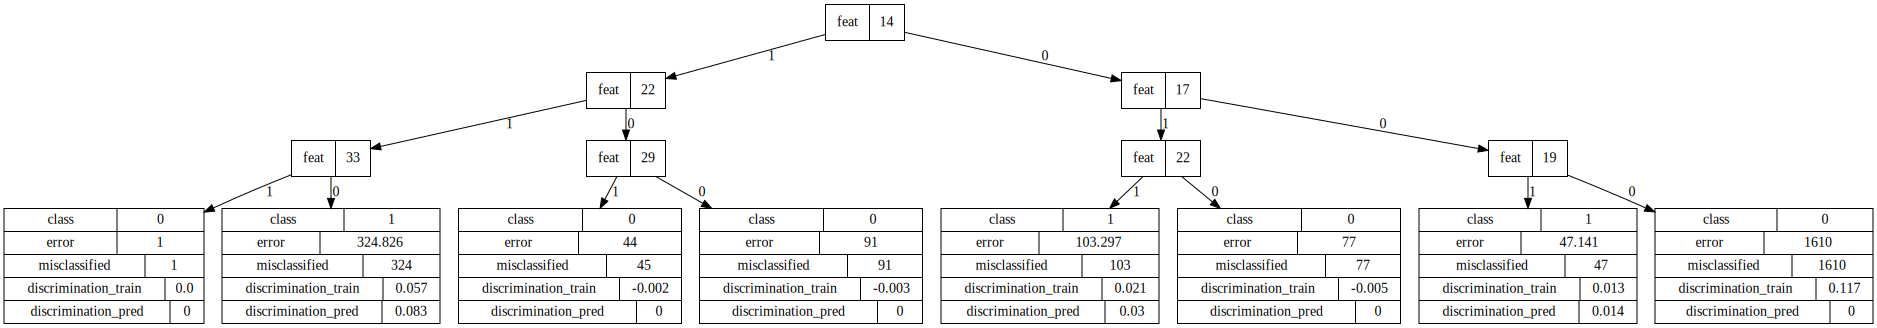

In [9]:
X_train, X_test, y_train, y_test, sensitive_train, sensitive_test = utils.train_test_split(1, X, y, sensitive)

clf = DL85Classifier(max_depth=3, error_function=lambda tids: utils.error(list(tids), 10, y_train, sensitive_train), min_sup=1, time_limit=300)
clf.fit(X_train, list(y_train))
y_pred_train = clf.predict(X_train)

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print(f'accuracy_pred = {round(accuracy_score(y_train, y_pred_train), 8)}')
print(f'accuracy_test = {round(accuracy_score(y_test, y_pred_test), 8)}')
print(f'discrimination_train = {round(utils.discrimination(y_train, sensitive_train), 8)}')
print(f'discrimination_train_pred = {round(utils.discrimination(y_pred_train, sensitive_train), 8)}')

utils.tree_upgrade(clf.tree_, y_train, np.asarray(y_pred_train), sensitive_train)
dot = utils.export_graphviz(clf)
graph = graphviz.Source(dot, format="png")
graph.render("plots/"+FILE_NAME+"tree")
graphviz.Source(dot)


In [10]:
discri_test= list()
utils.get_discri_test(clf.tree_, X_test, y_test, sensitive_test, discri_test, X.columns, path=None)
sum_discrimination_additive_test_pred = sum(discri_test)
sum_discrimination_additive_test_pred_abs = 0
[sum_discrimination_additive_test_pred_abs := sum_discrimination_additive_test_pred_abs + abs(d) for d in discri_test]
print(sum_discrimination_additive_test_pred)
sum_discrimination_additive_test_pred_abs

0.19311822800063677


0.22099110735854494

In [11]:
discri_test

[0.0009813542688910696,
 0.05708378589147069,
 -9.067955256693684e-05,
 -0.007413557197639108,
 0.023635121601279993,
 -0.006432202928748038,
 0.010168200494505826,
 0.11518620542344327]

In [12]:
utils.discrimination(y_train, sensitive_train)

0.19722738089569225

In [13]:
print(utils.sum_elem_tree(clf.tree_, 'discrimination_additive_train'))
print(utils.sum_elem_tree(clf.tree_, 'discrimination_additive_train', do_abs=True))
print(utils.sum_elem_tree(clf.tree_, 'discrimination_additive_pred'))
print(utils.sum_elem_tree(clf.tree_, 'discrimination_additive_pred', do_abs=True))

0.19722738089569222
0.2193770388735279
0.1265522864076726
0.1265522864076726


In [14]:
utils.sum_elem_tree(clf.tree_, 'misclassified')

2298

In [15]:
print(utils.discrimination(y_train, sensitive_train))
print(utils.discrimination(y_pred_train, sensitive_train))
print(utils.discrimination(y_test, sensitive_test))
print(utils.discrimination(y_pred_test, sensitive_test))

0.19722738089569225
0.1265522864076726
0.19311822800063677
0.12116501058935664


In [16]:
clf.tree_

{'feat': 14,
 'left': {'feat': 22,
  'left': {'feat': 33,
   'left': {'value': 0,
    'error': 1.0,
    'transactions': [6208,
     4131,
     5507,
     7075,
     4358,
     10564,
     3081,
     396,
     5109,
     9463,
     8856,
     5339],
    'proba': [0.9166666666666666, 0.08333333333333333],
    'discrimination_additive_train': 0.00012331976815883587,
    'discrimination_additive_pred': 0.0,
    'misclassified': 1},
   'right': {'value': 1,
    'error': 324.826202,
    'transactions': [8196,
     8197,
     10244,
     7,
     10247,
     2060,
     13,
     6156,
     15,
     10254,
     10255,
     8212,
     8215,
     8216,
     2074,
     10268,
     2078,
     2080,
     8227,
     4135,
     10283,
     8236,
     8239,
     2096,
     10288,
     4147,
     8243,
     8245,
     6199,
     8254,
     6207,
     10304,
     10307,
     2120,
     6221,
     6222,
     8269,
     2128,
     10318,
     10320,
     10323,
     6228,
     4183,
     6231,
     2139,
  

# Graphs

<Figure size 648x432 with 0 Axes>

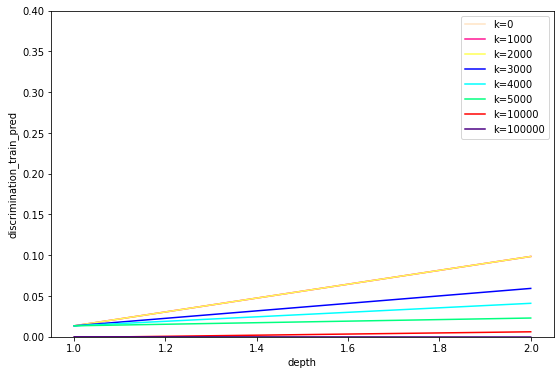

In [39]:
utils.plot_mean("depth", "discrimination_train_pred", result, 0, 0.4)

<Figure size 648x432 with 0 Axes>

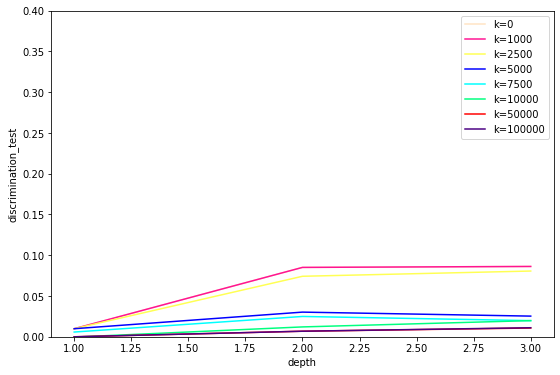

In [18]:
utils.plot_mean("depth", "discrimination_test", result, 0, 0.4)

<Figure size 648x432 with 0 Axes>

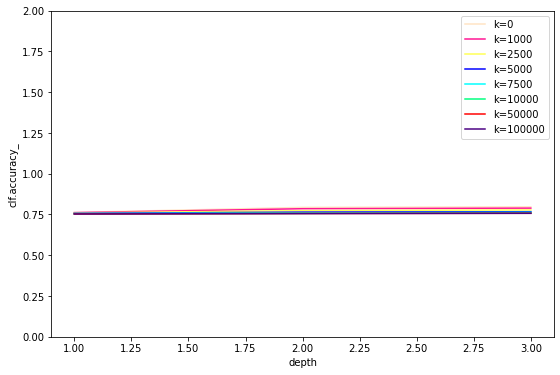

In [19]:
utils.plot_mean("depth", "clf.accuracy_", result, 0, 2)

<Figure size 648x432 with 0 Axes>

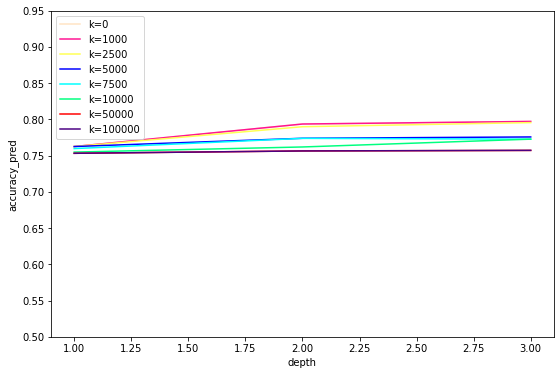

In [20]:
utils.plot_mean("depth", "accuracy_pred", result, 0.5, 0.95)

<Figure size 648x432 with 0 Axes>

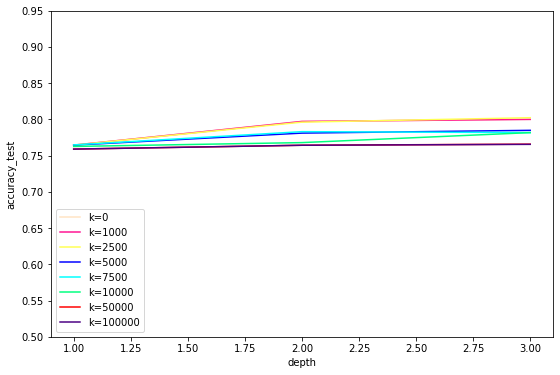

In [21]:
utils.plot_mean("depth", "accuracy_test", result, 0.5, 0.95)

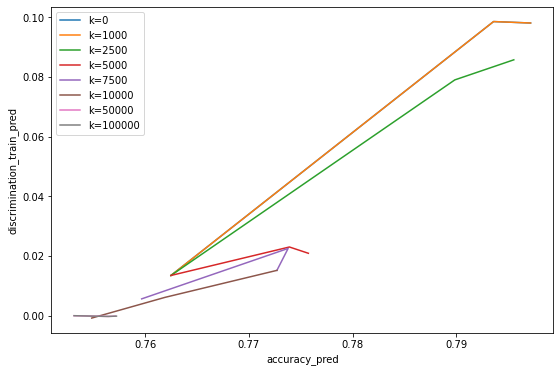

In [22]:
utils.plot2("accuracy_pred", "discrimination_train_pred", result)

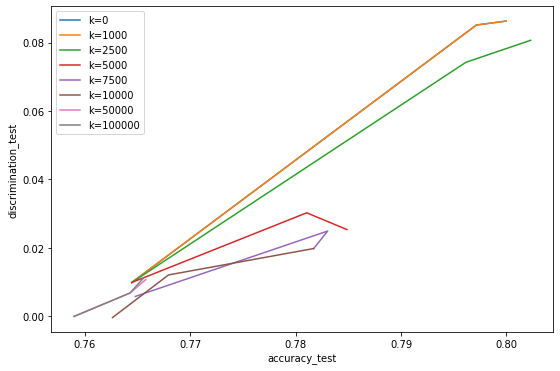

In [23]:
utils.plot2("accuracy_test", "discrimination_test", result)

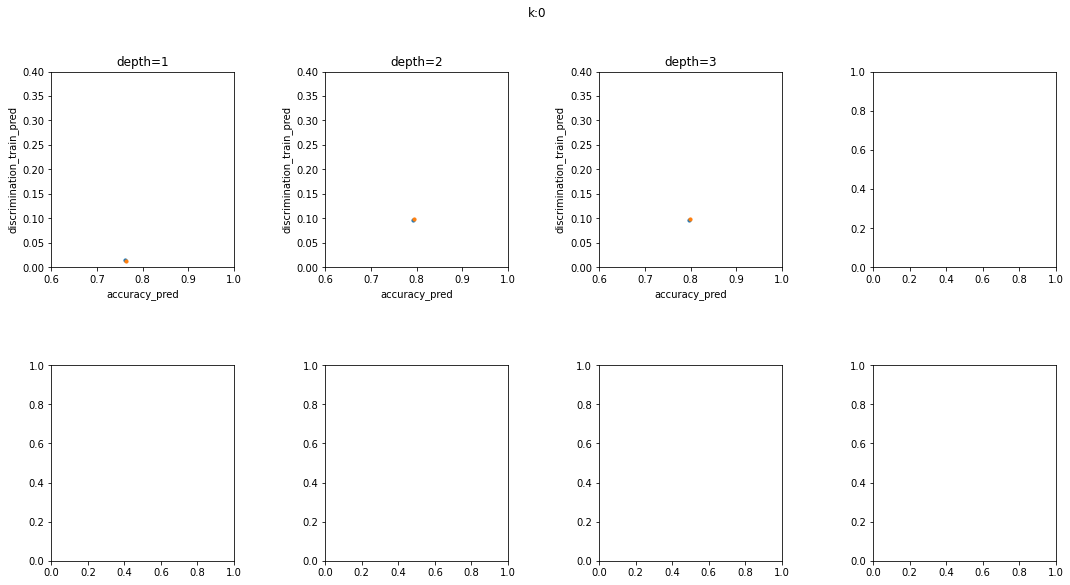

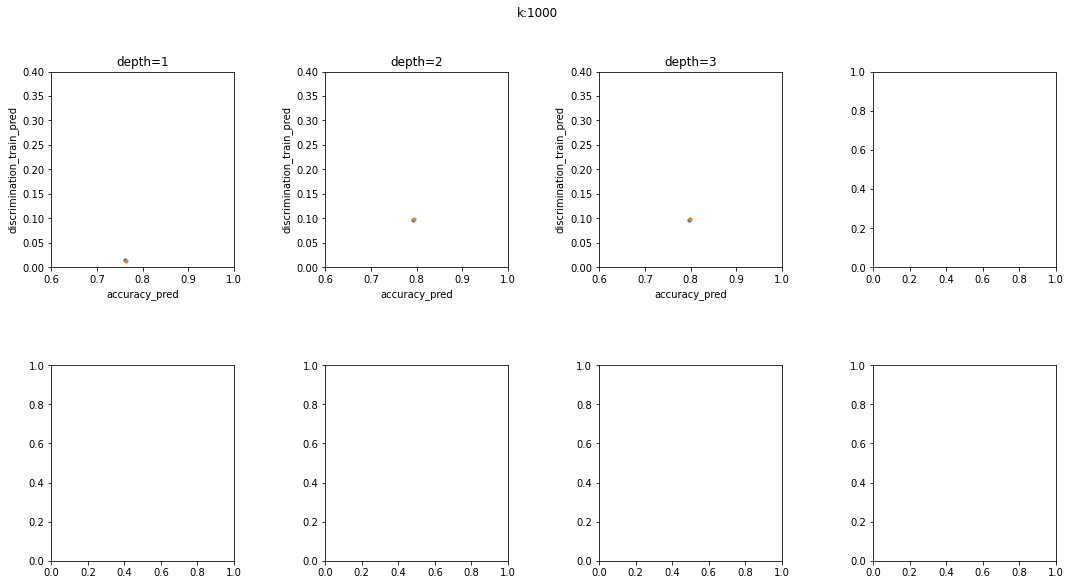

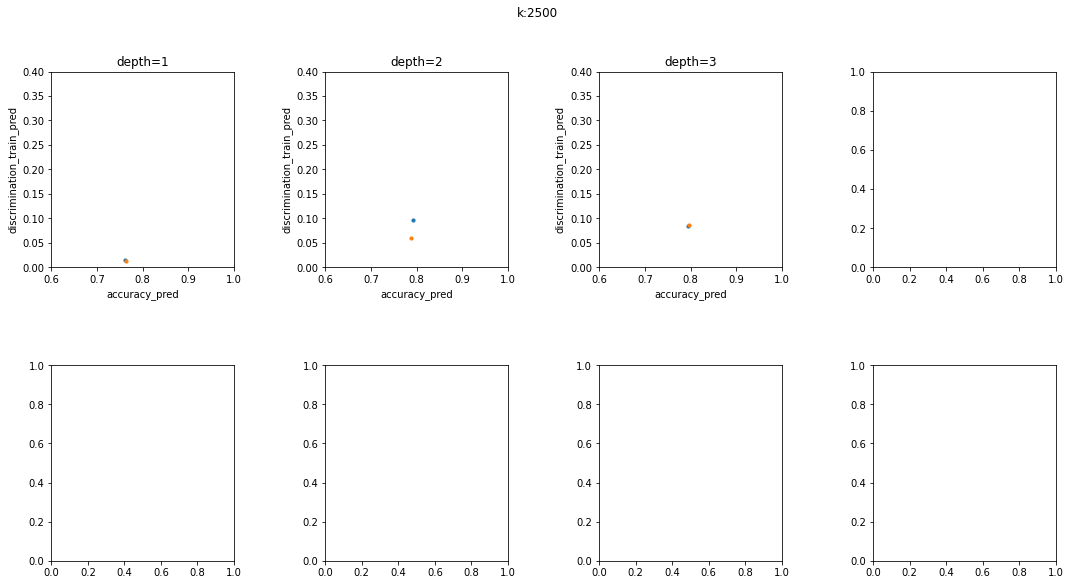

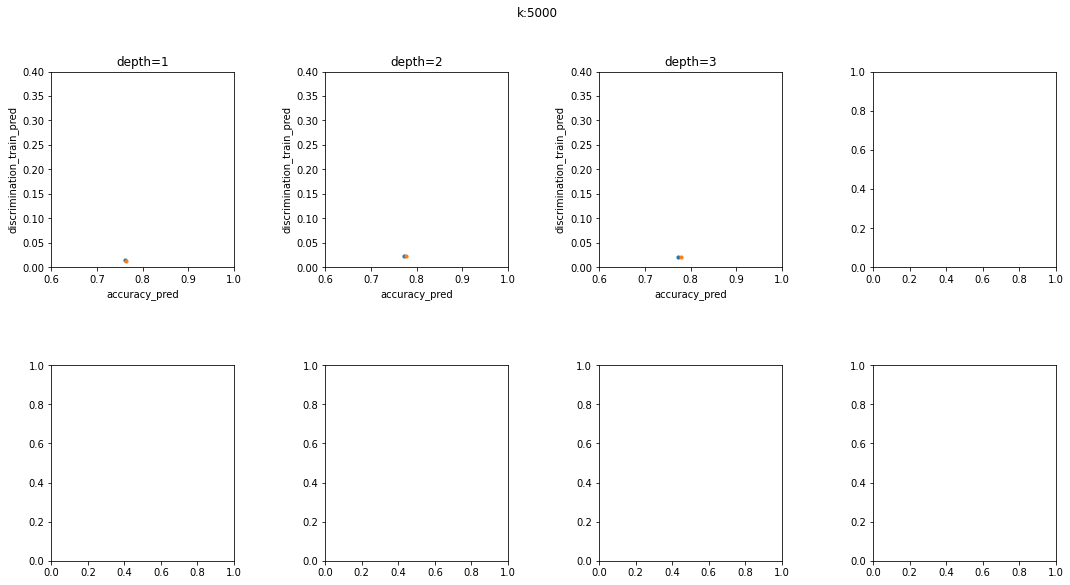

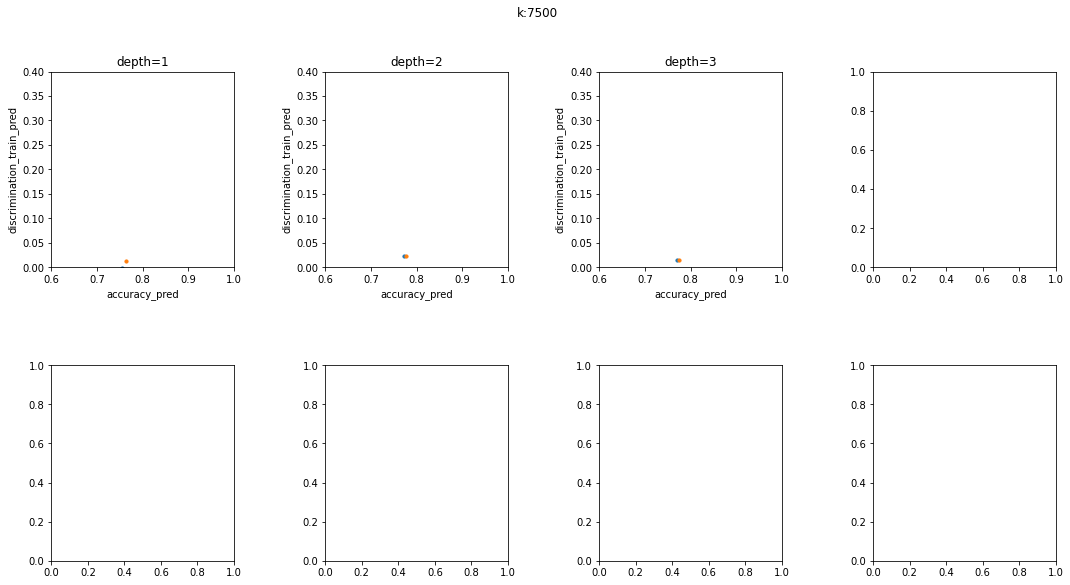

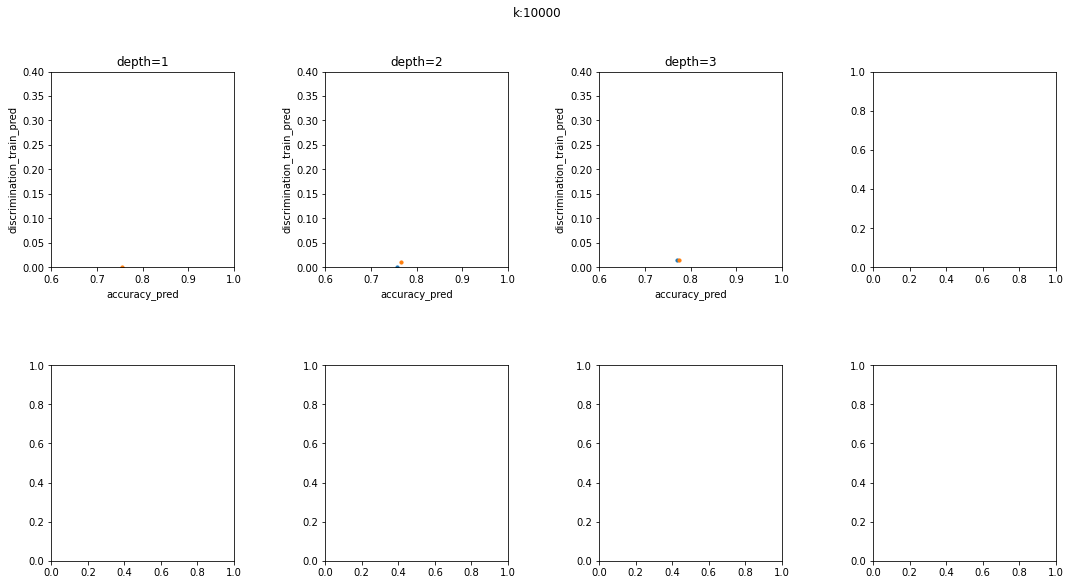

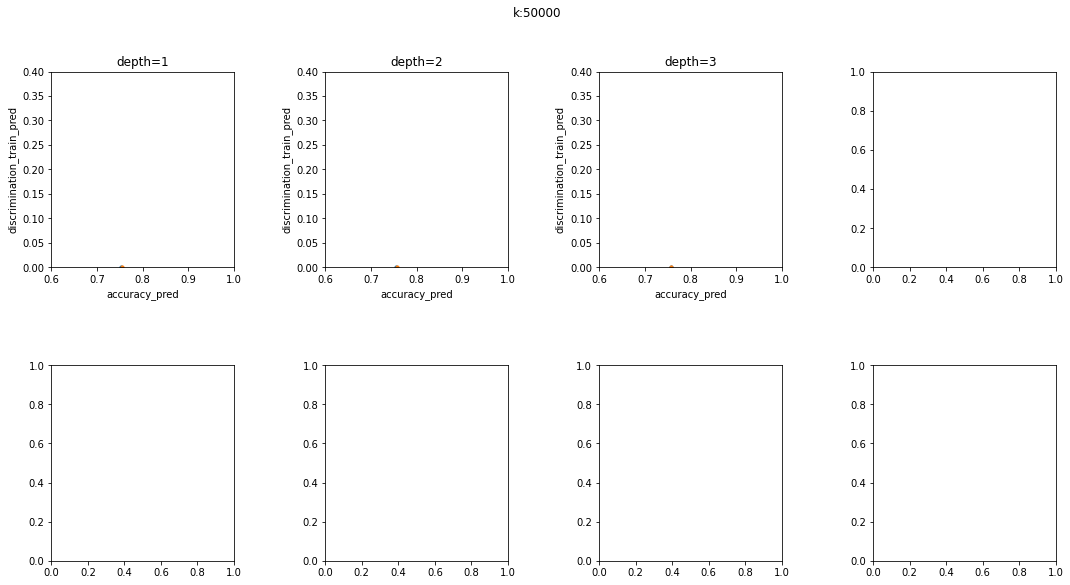

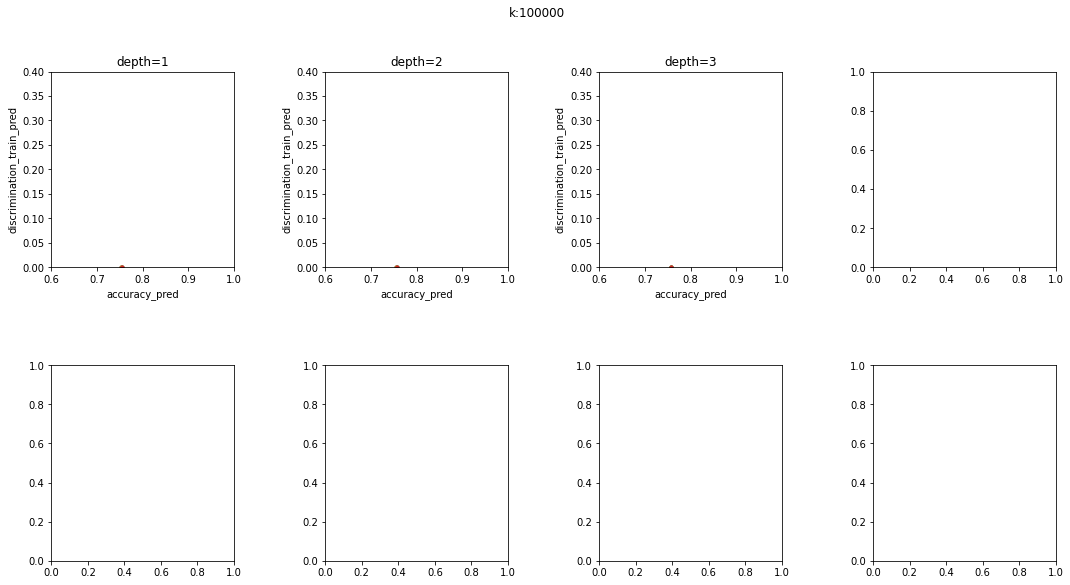

In [24]:
utils.plot_one_scatter_by_depth("accuracy_pred", "discrimination_train_pred", result, (0.6, 1), (0, 0.4))

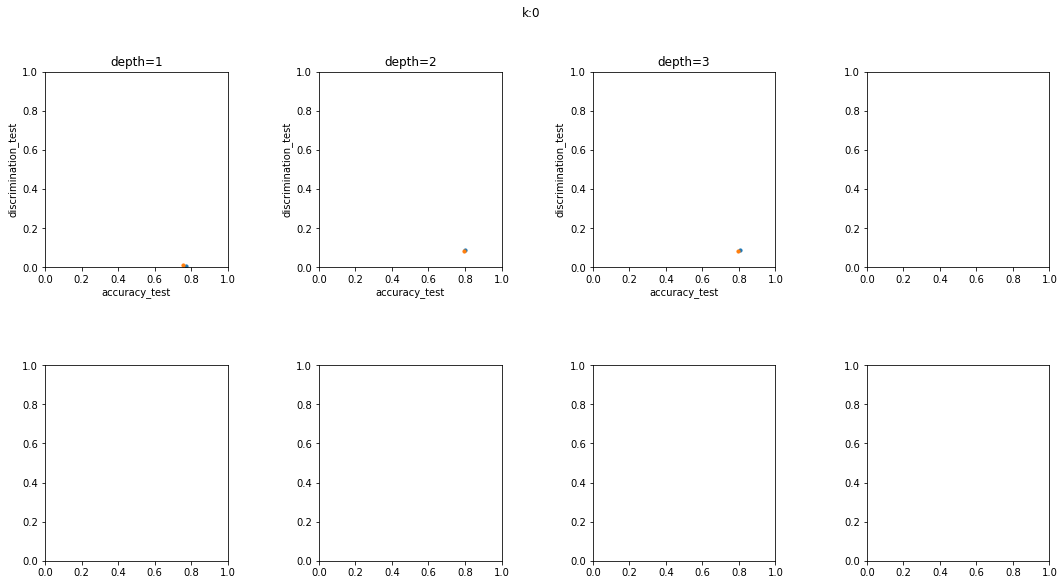

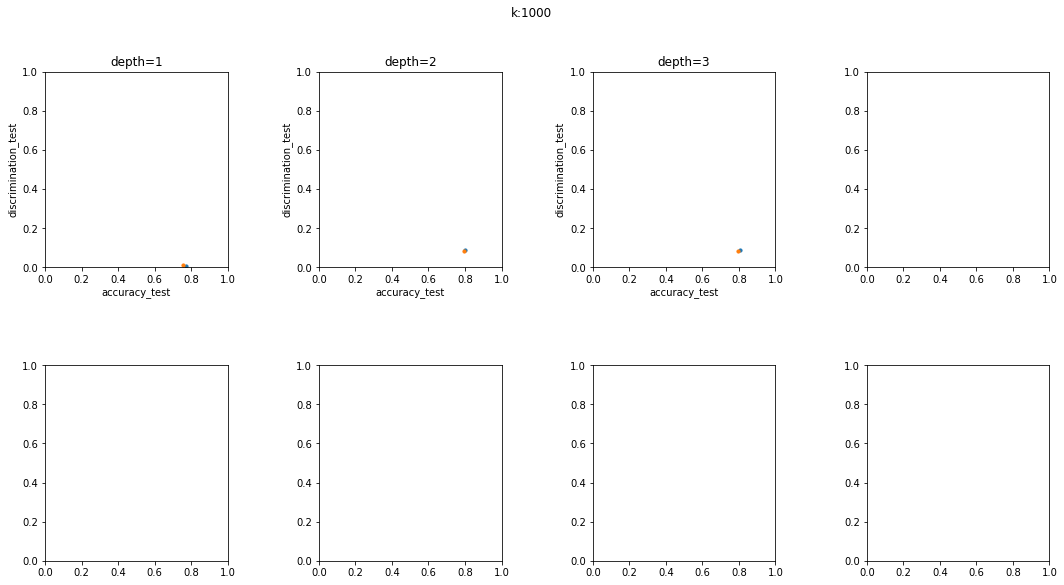

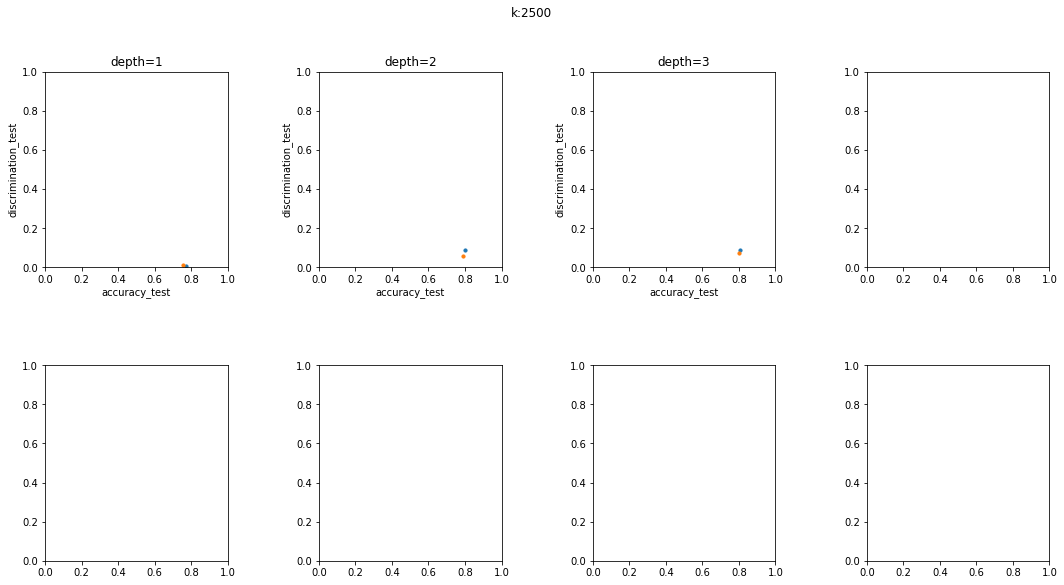

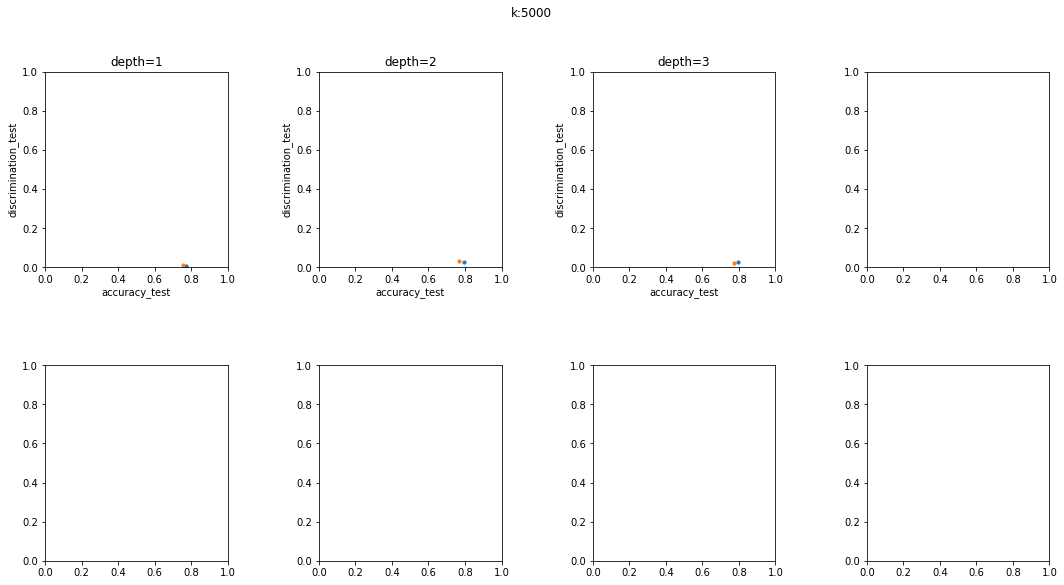

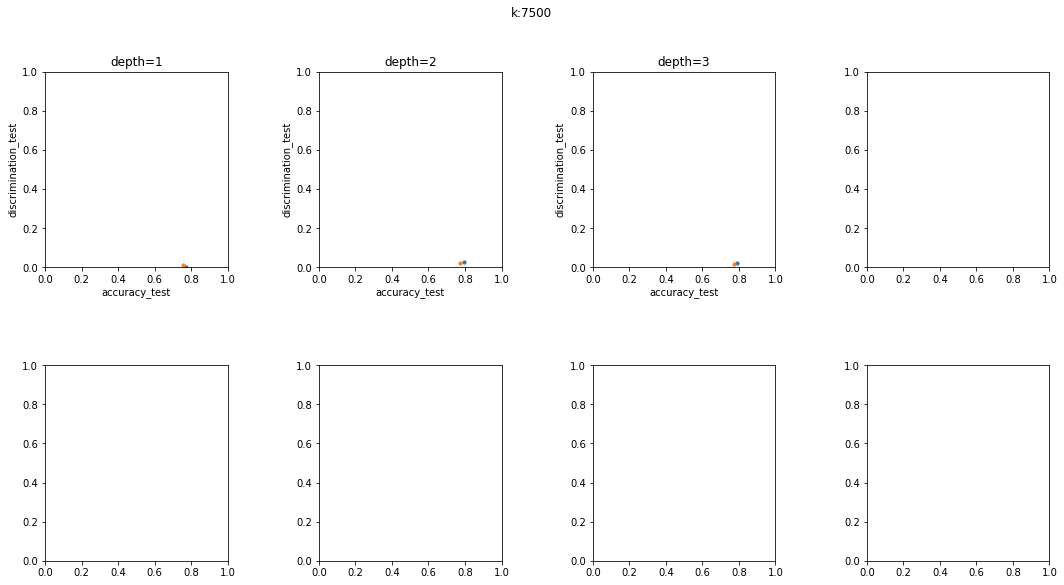

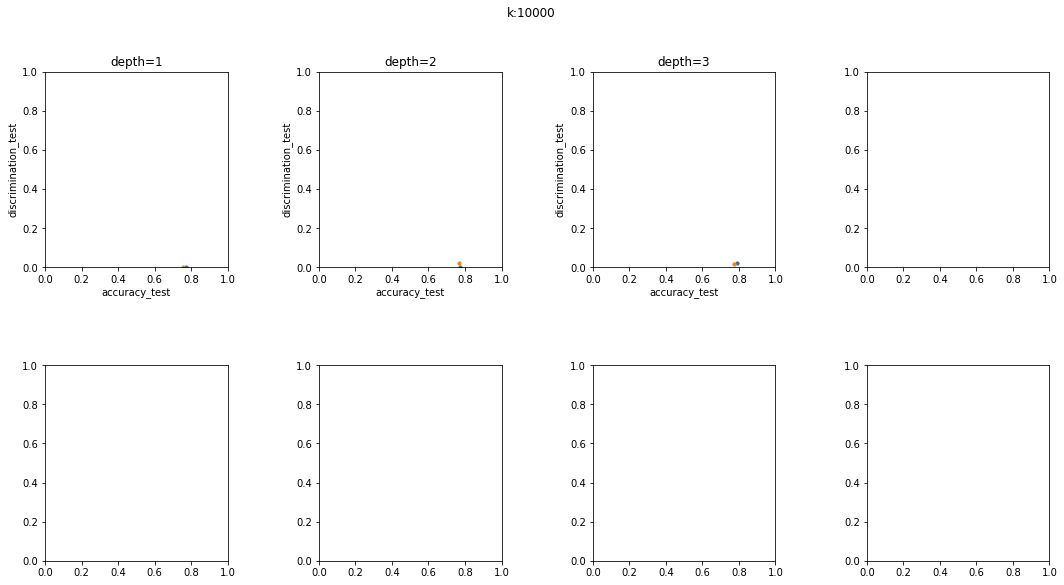

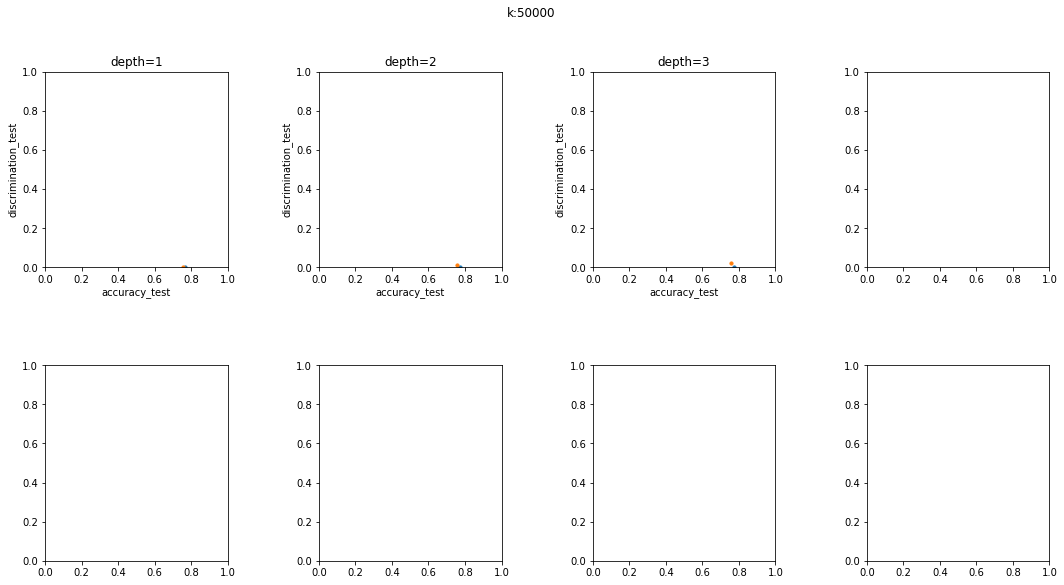

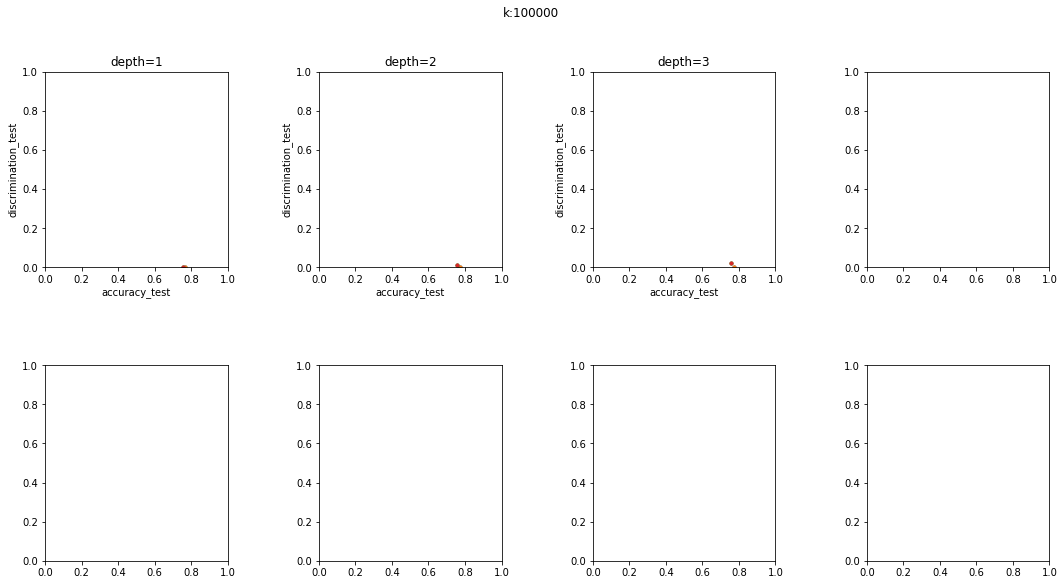

In [25]:
utils.plot_one_scatter_by_depth("accuracy_test", "discrimination_test", result, (0, 1), (0, 1))

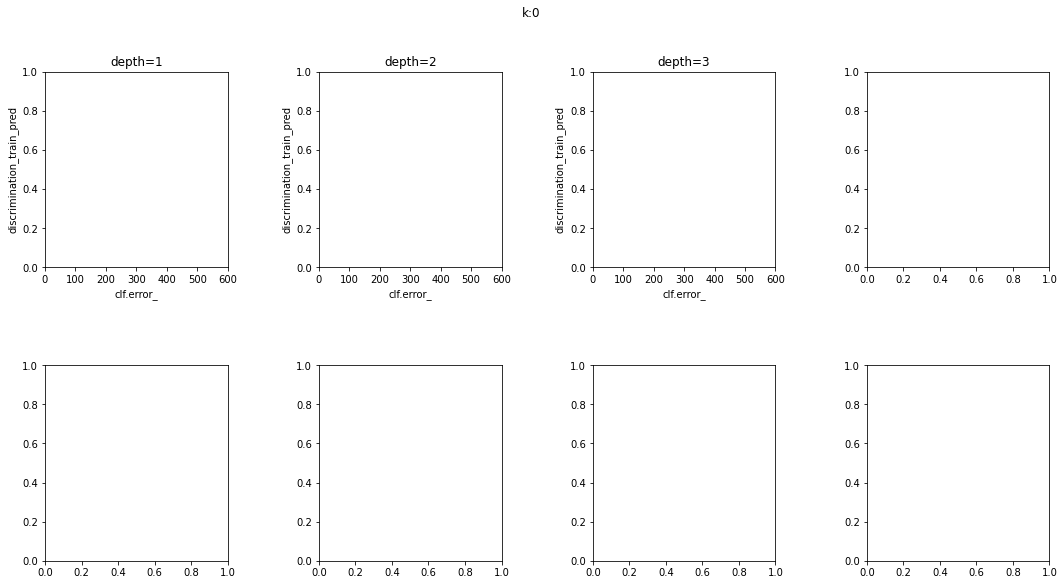

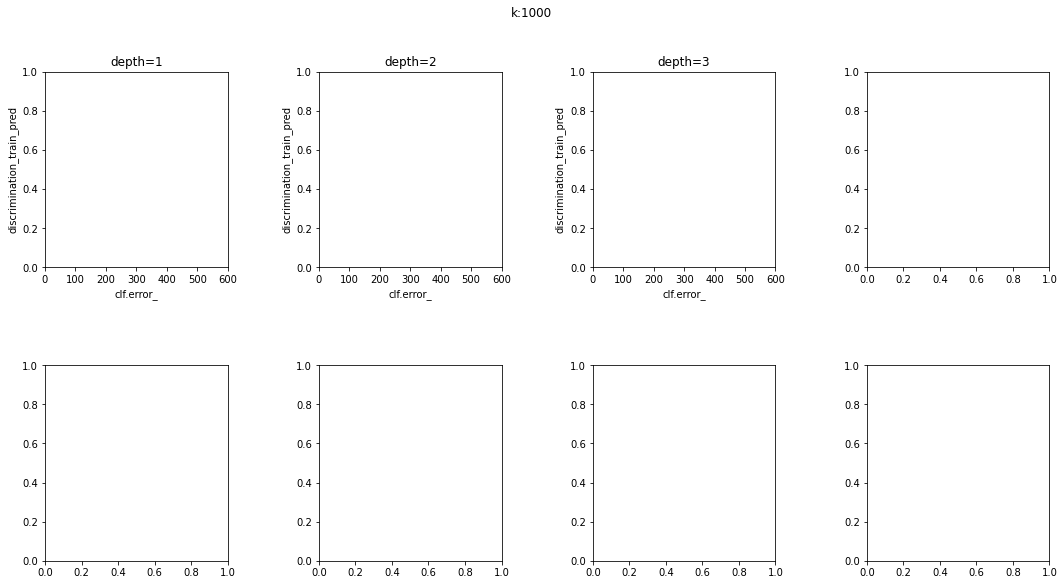

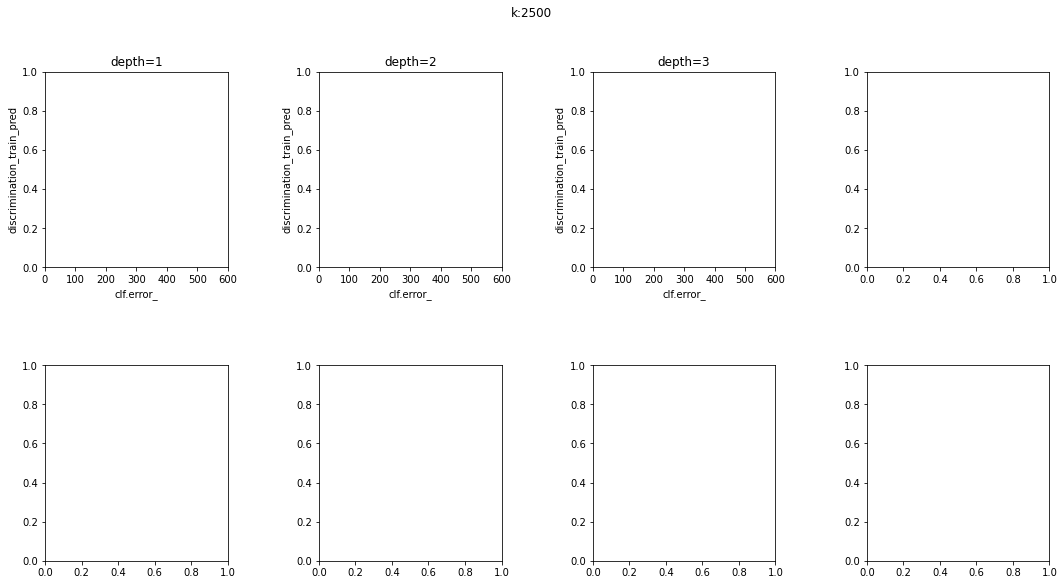

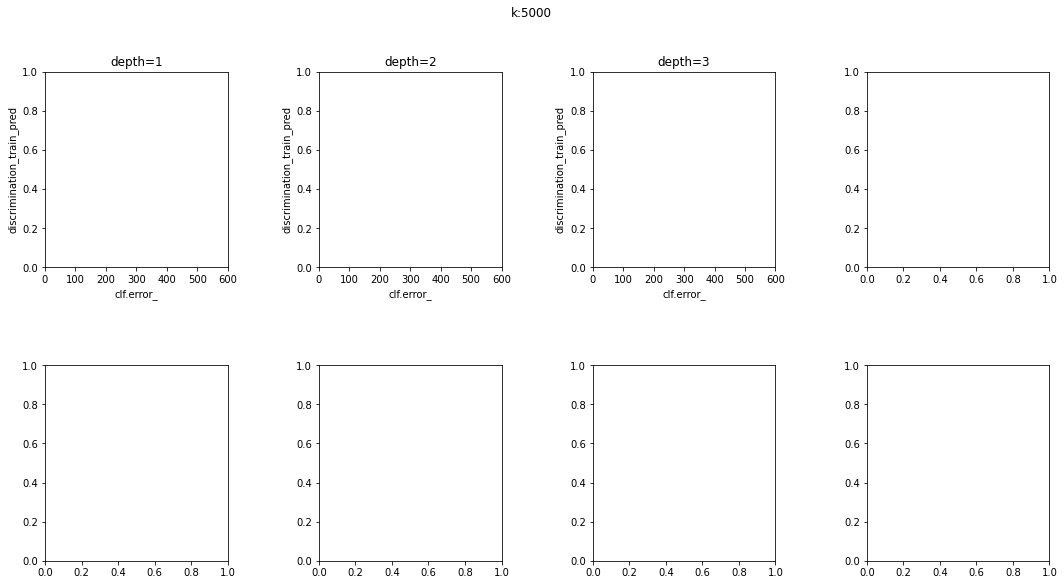

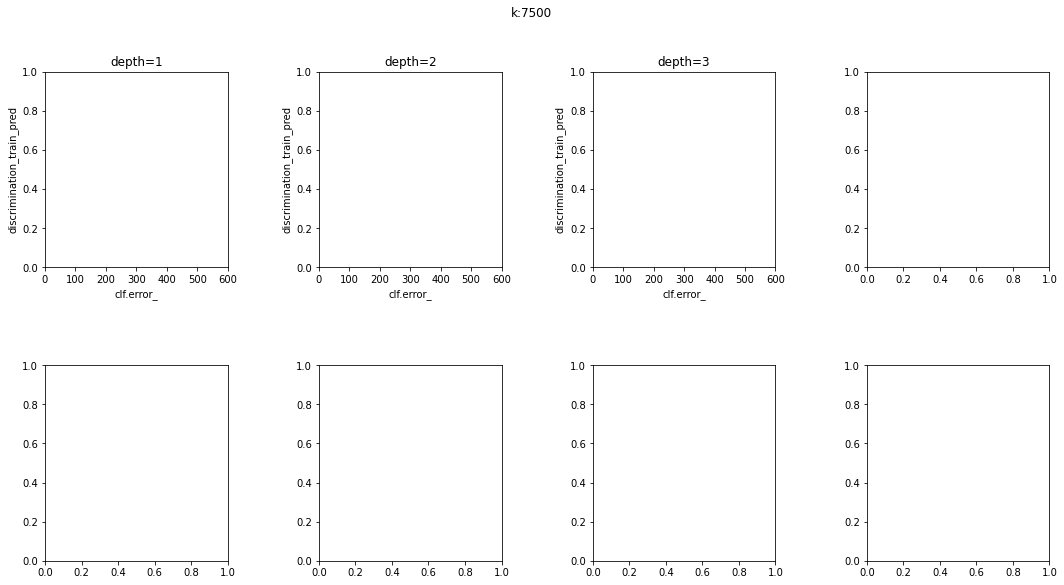

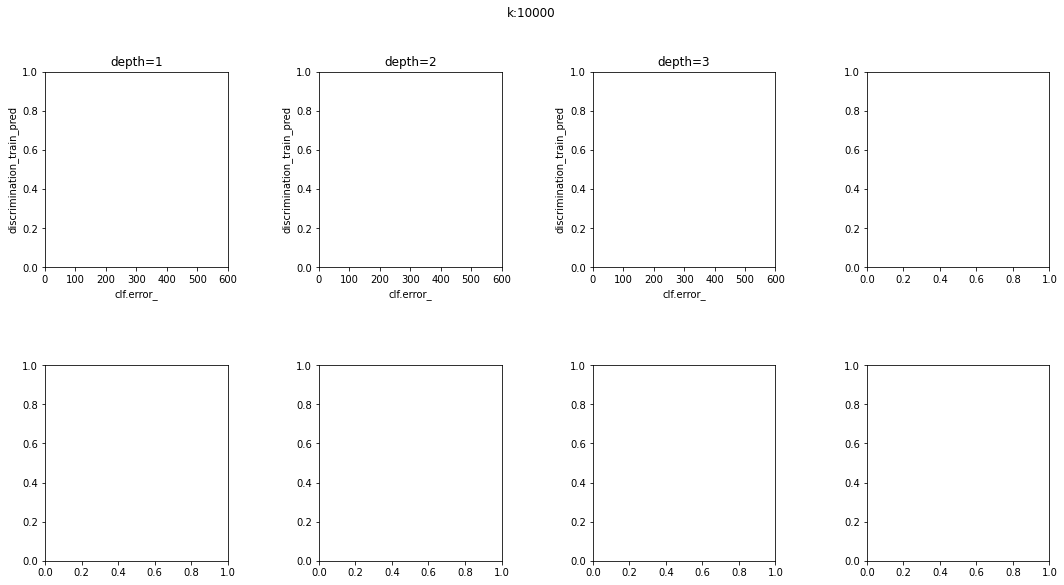

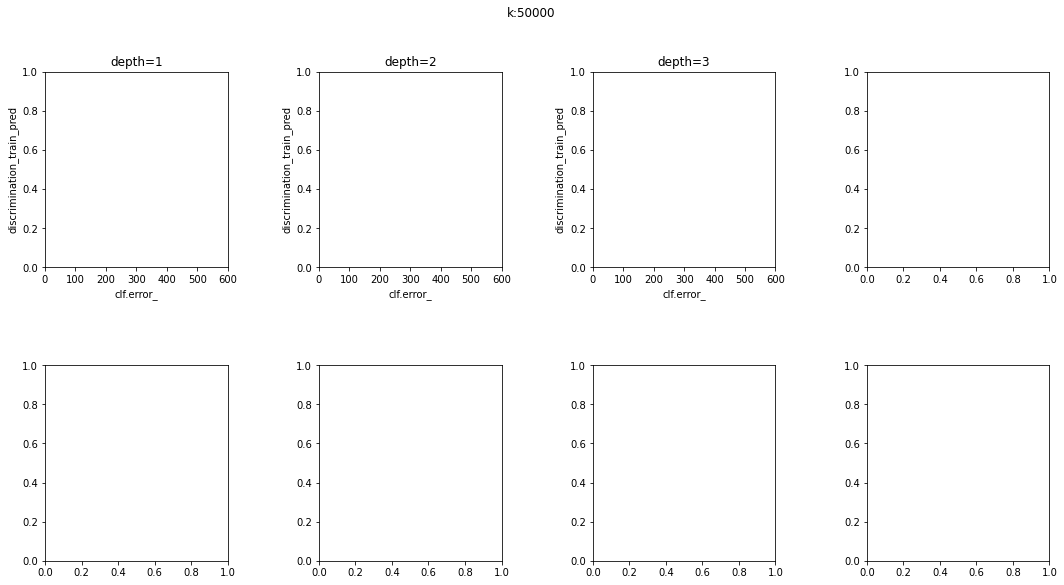

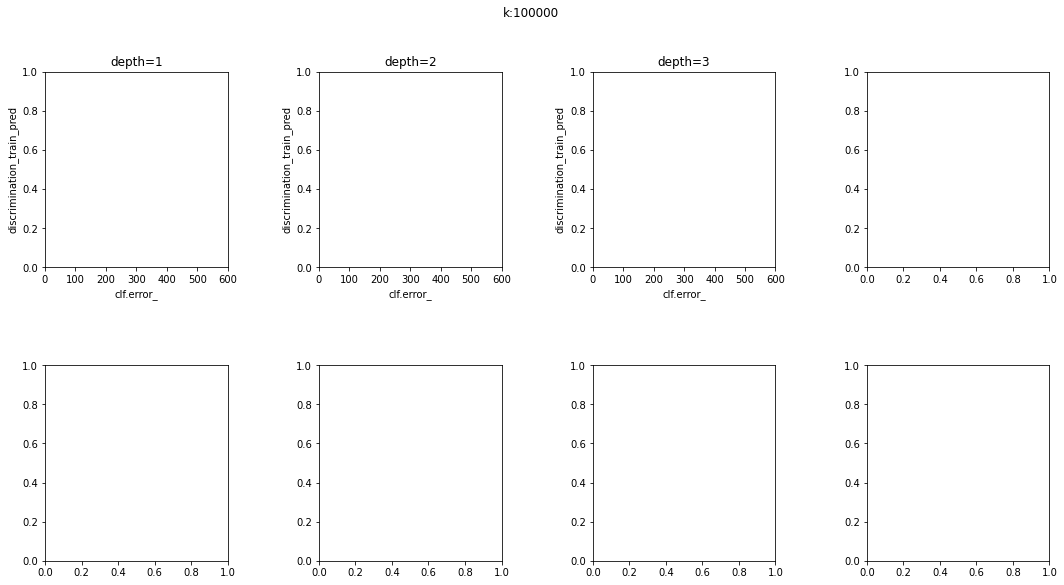

In [26]:
utils.plot_one_scatter_by_depth("clf.error_", "discrimination_train_pred", result, (0, 600), (0, 1))

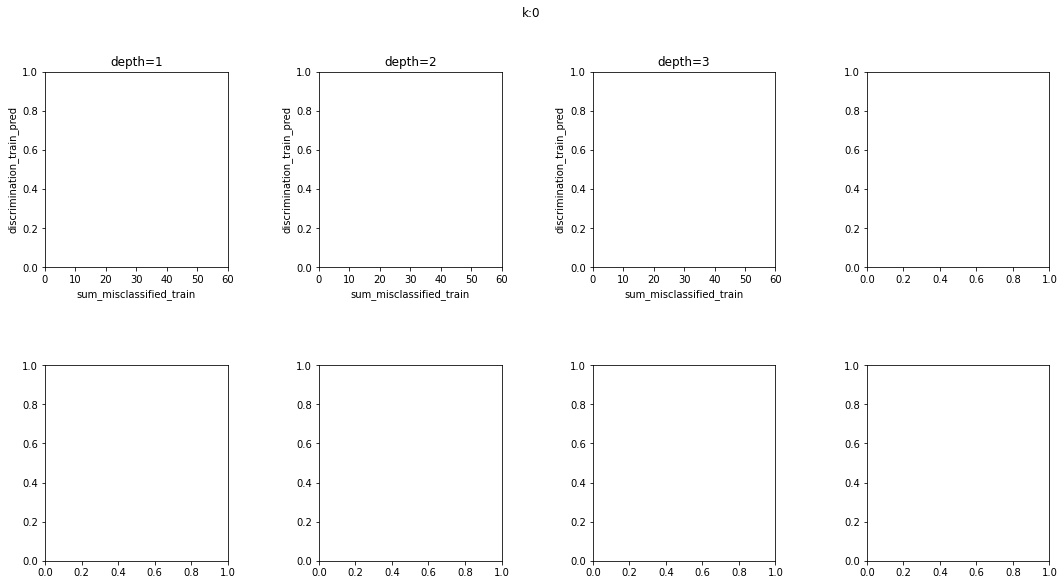

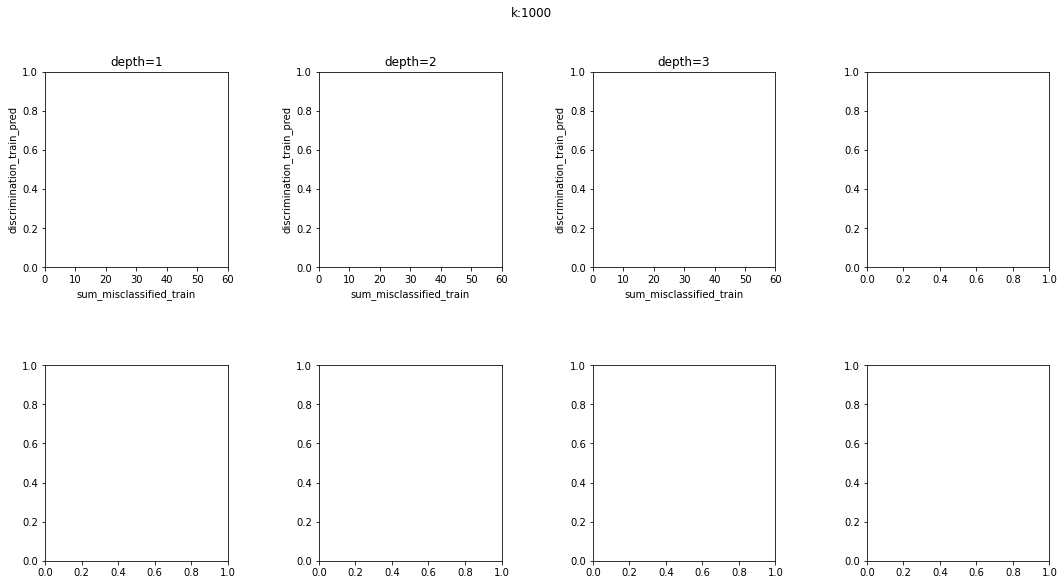

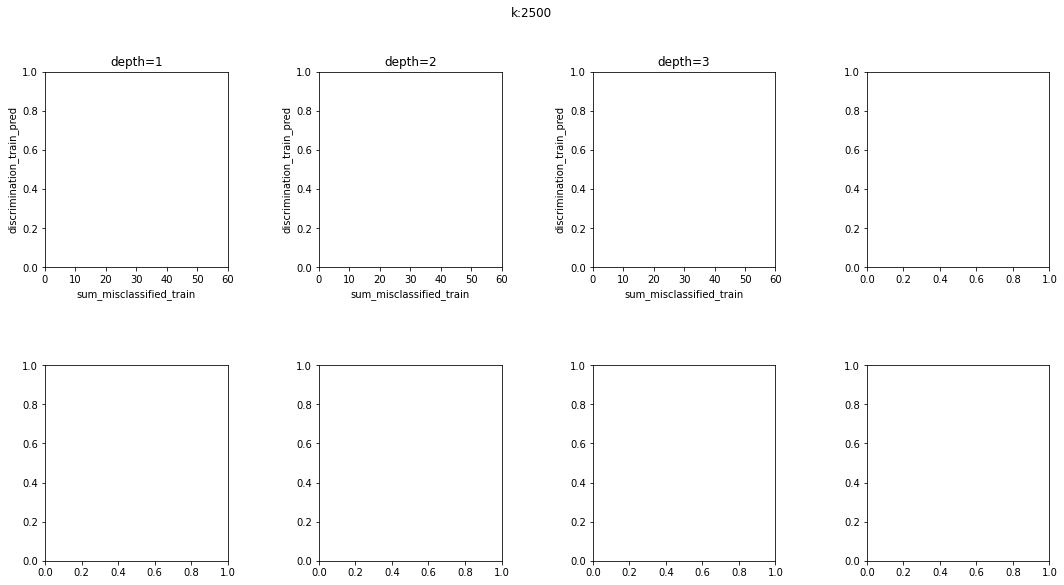

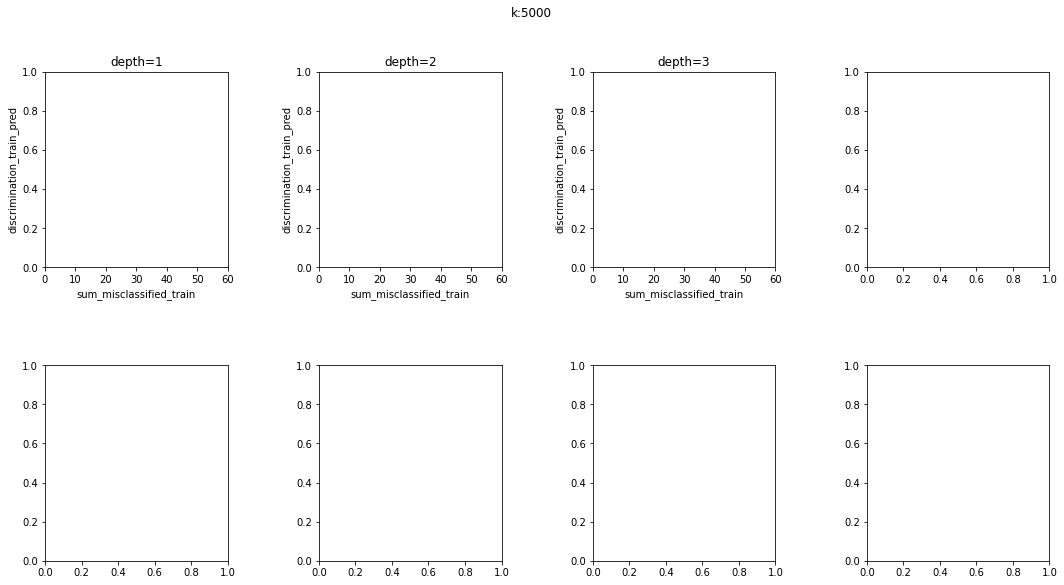

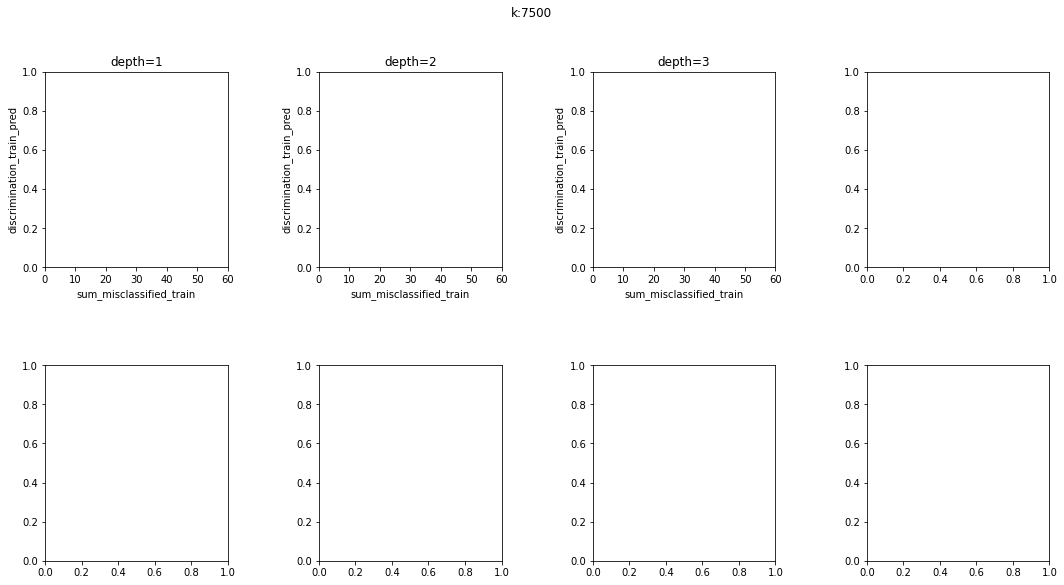

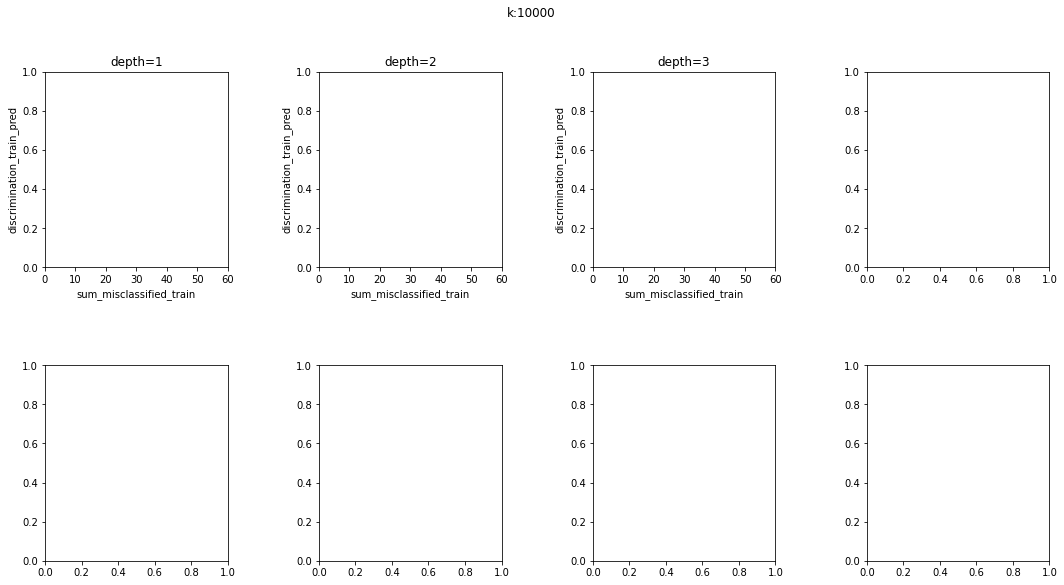

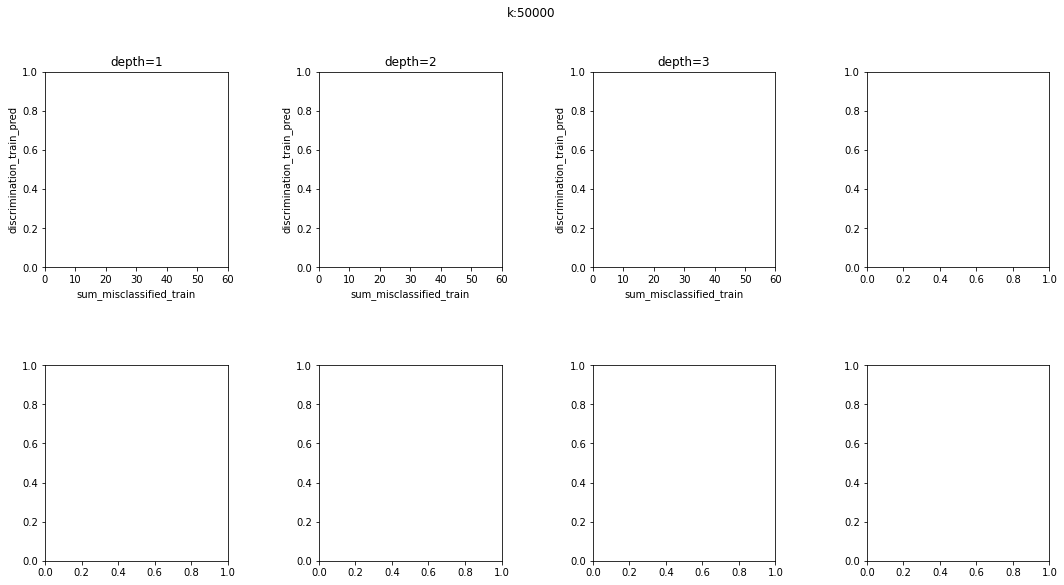

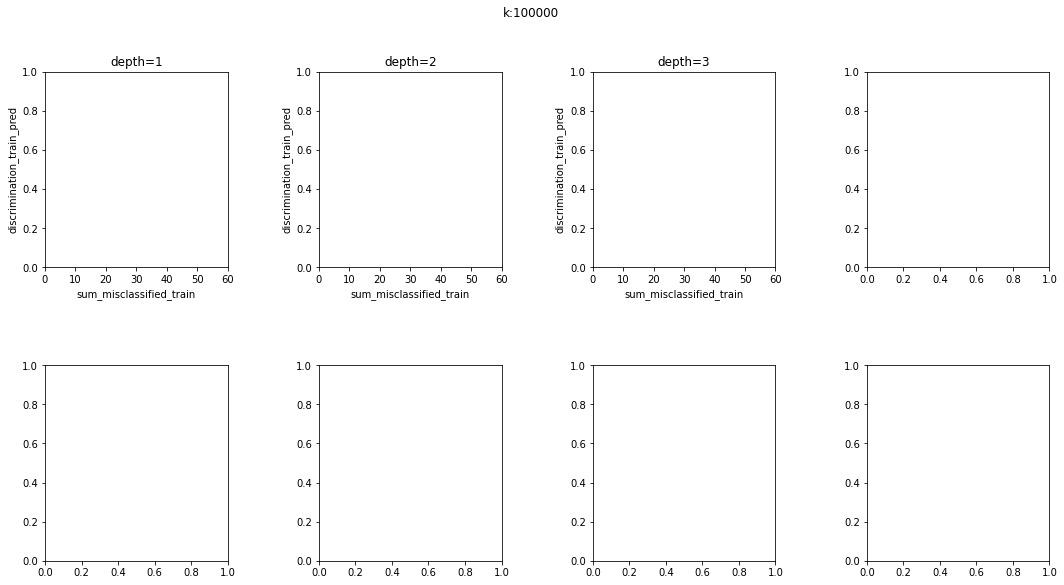

In [27]:
utils.plot_one_scatter_by_depth("sum_misclassified_train", "discrimination_train_pred", result, (0, 60), (0, 1))

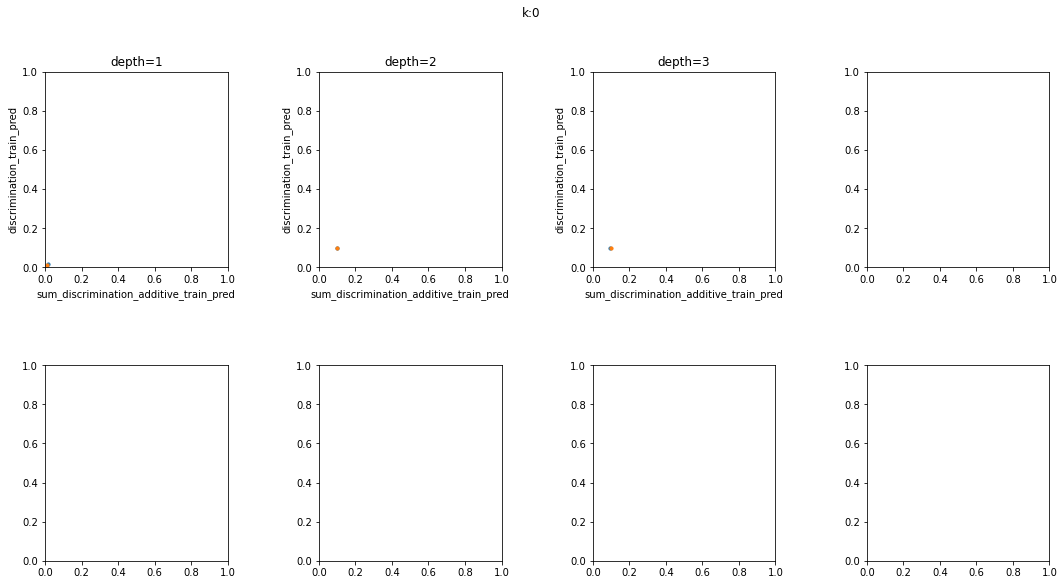

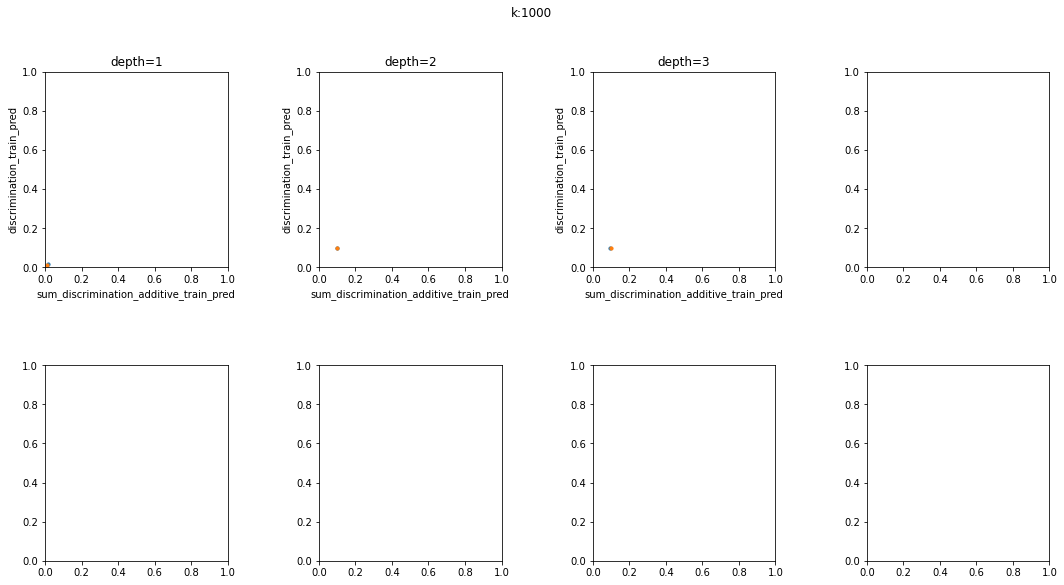

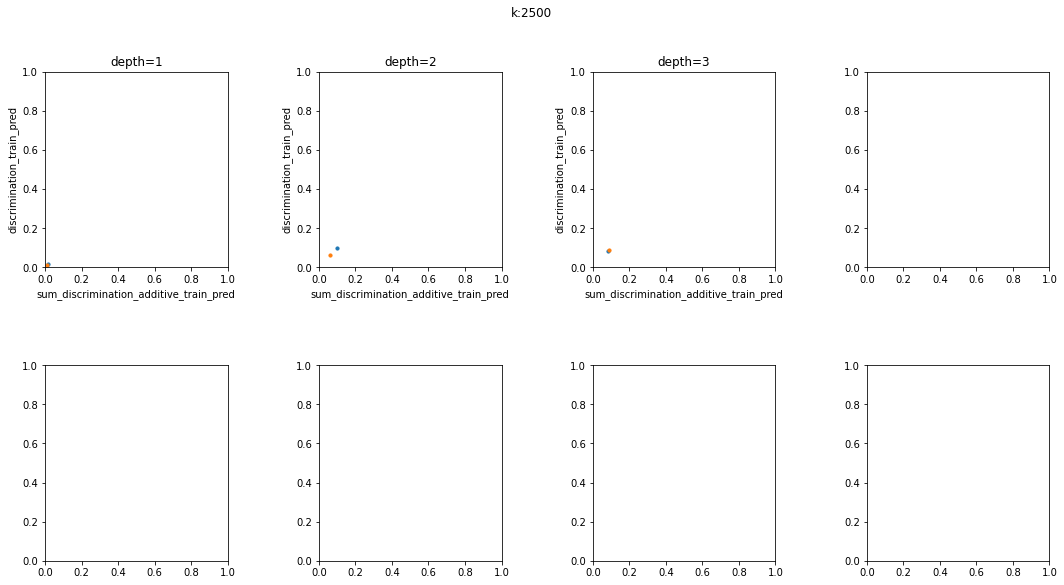

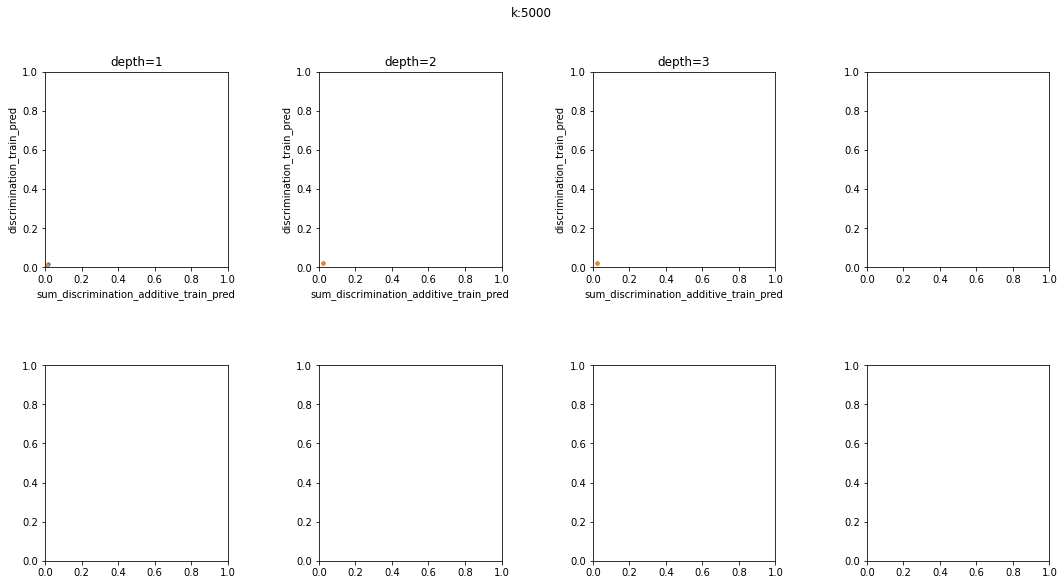

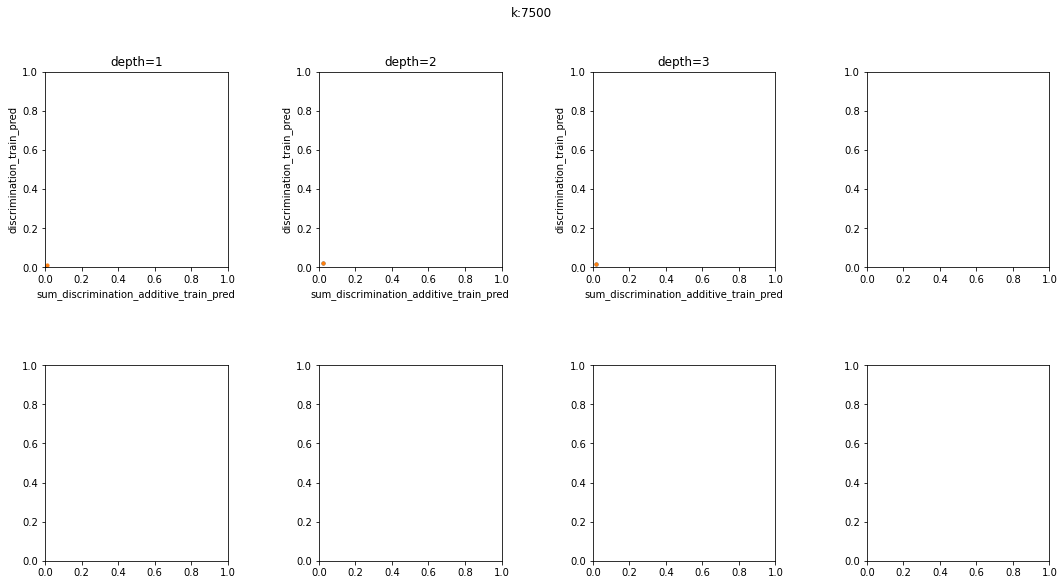

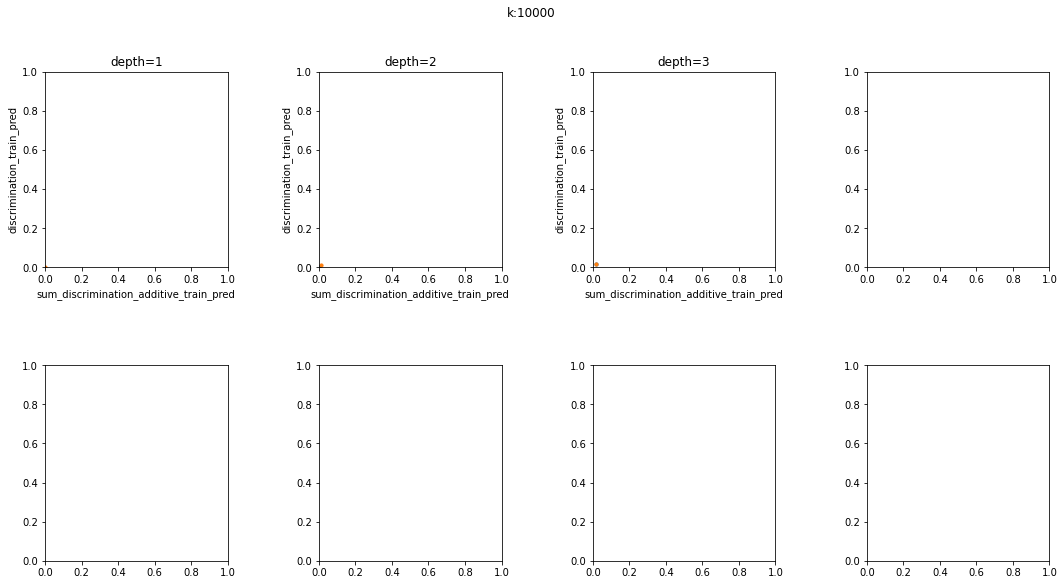

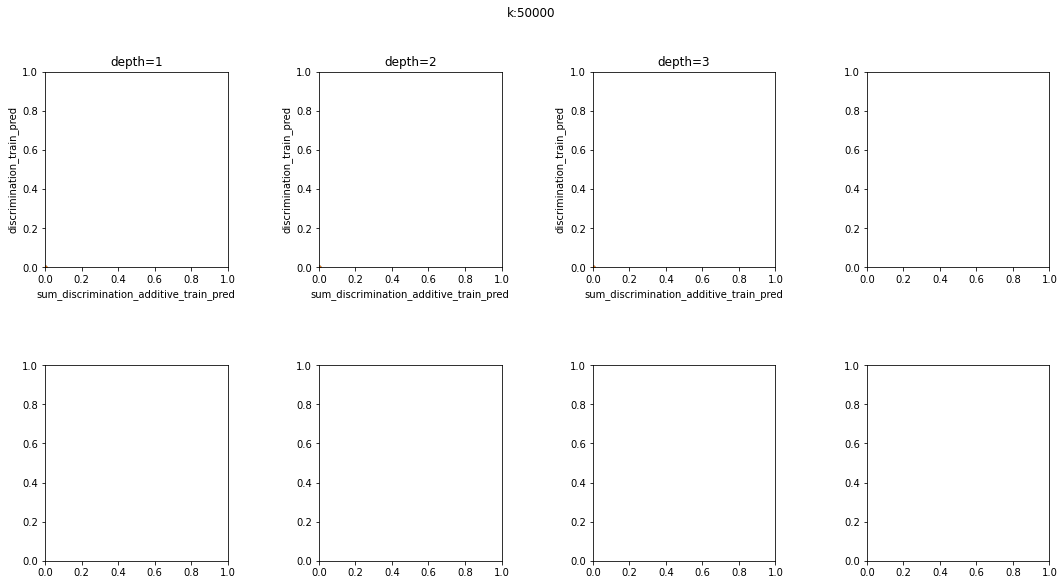

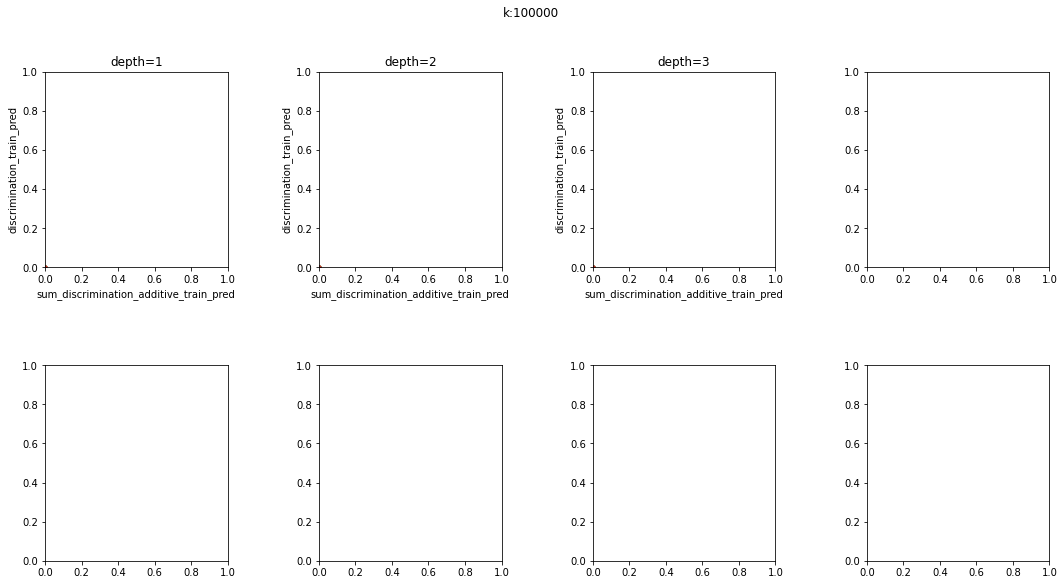

In [28]:
utils.plot_one_scatter_by_depth("sum_discrimination_additive_train_pred", "discrimination_train_pred", result, (0, 1), (0, 1))

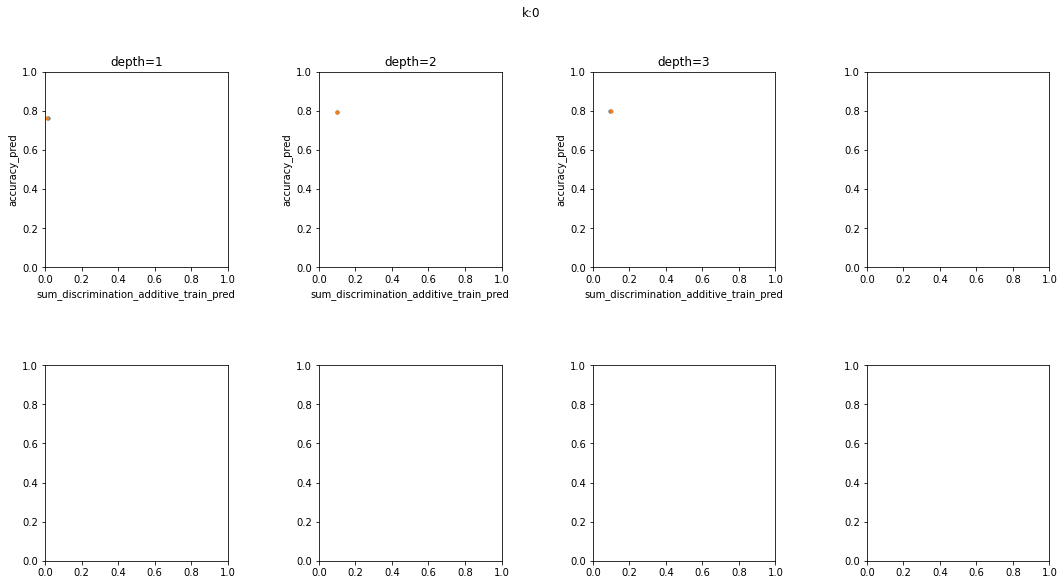

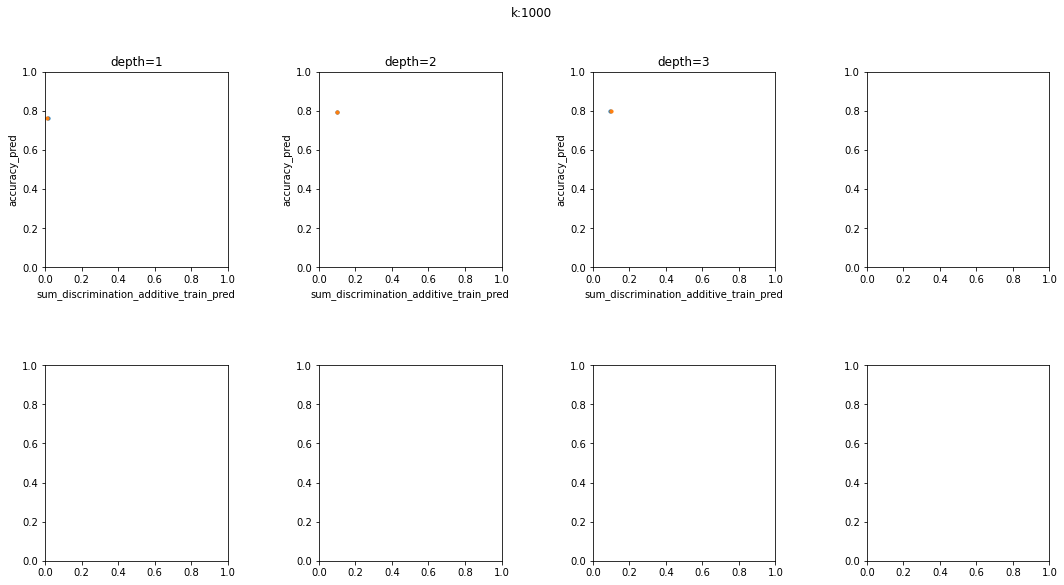

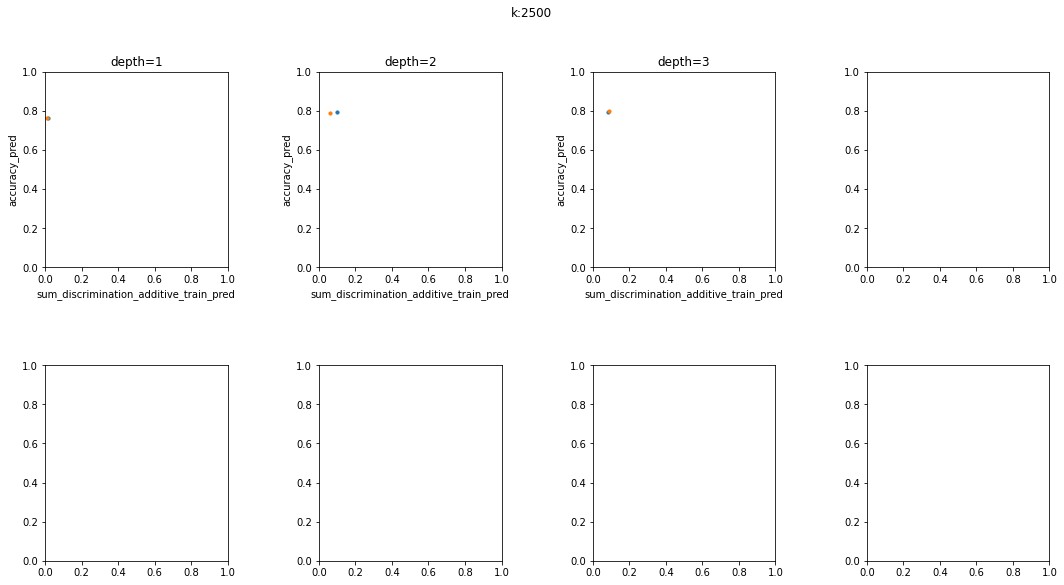

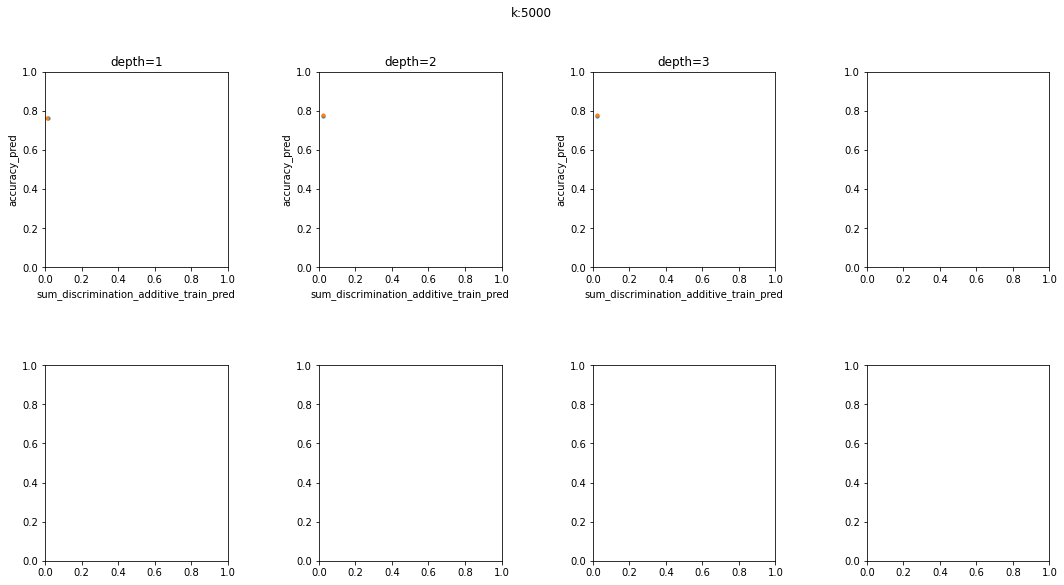

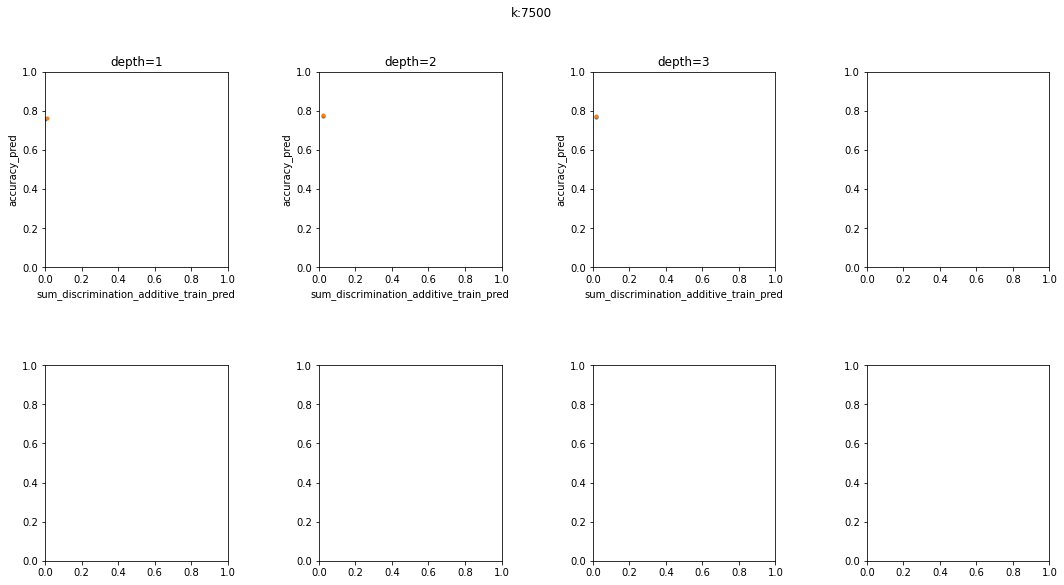

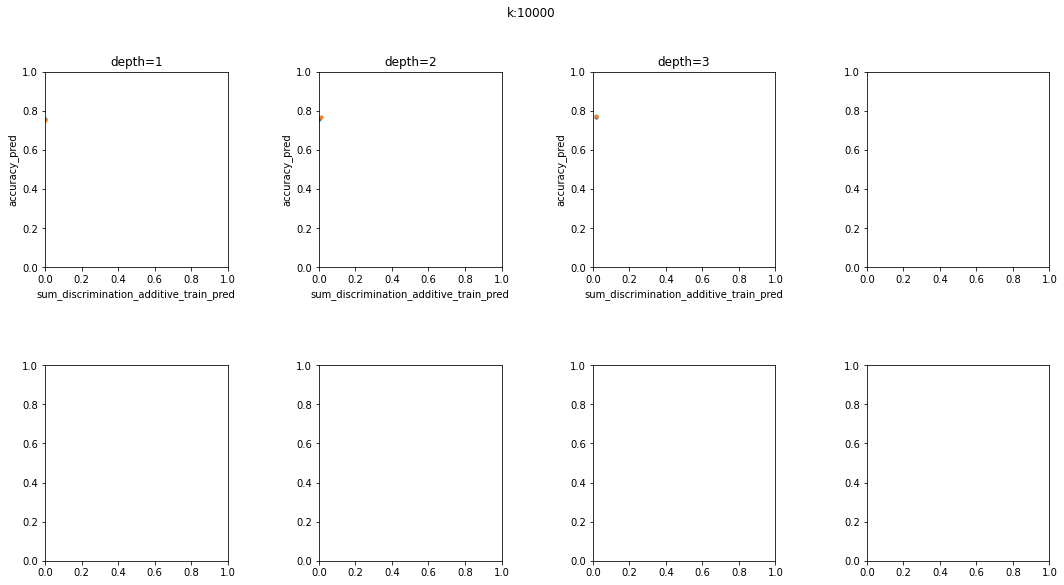

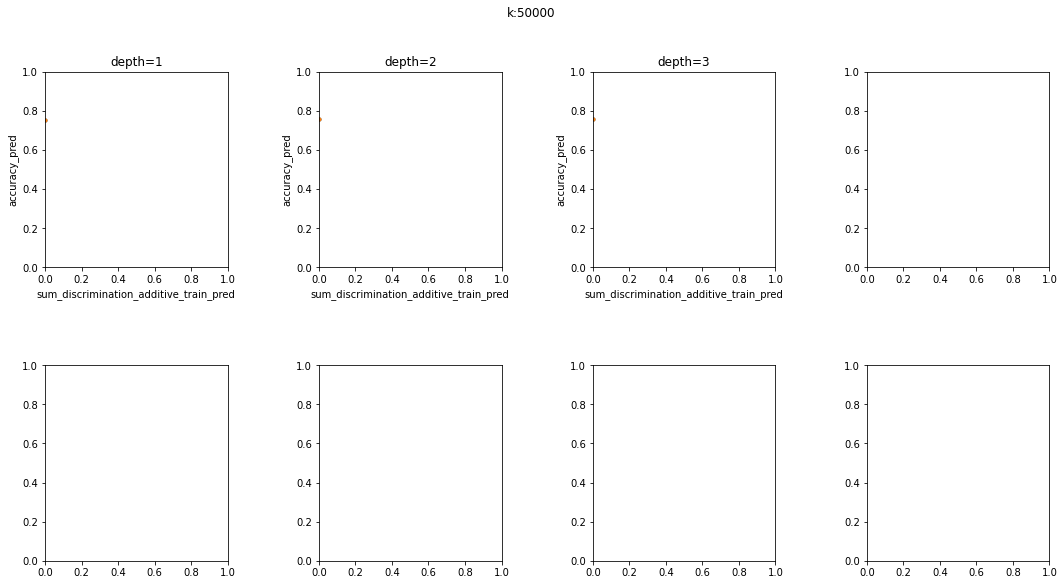

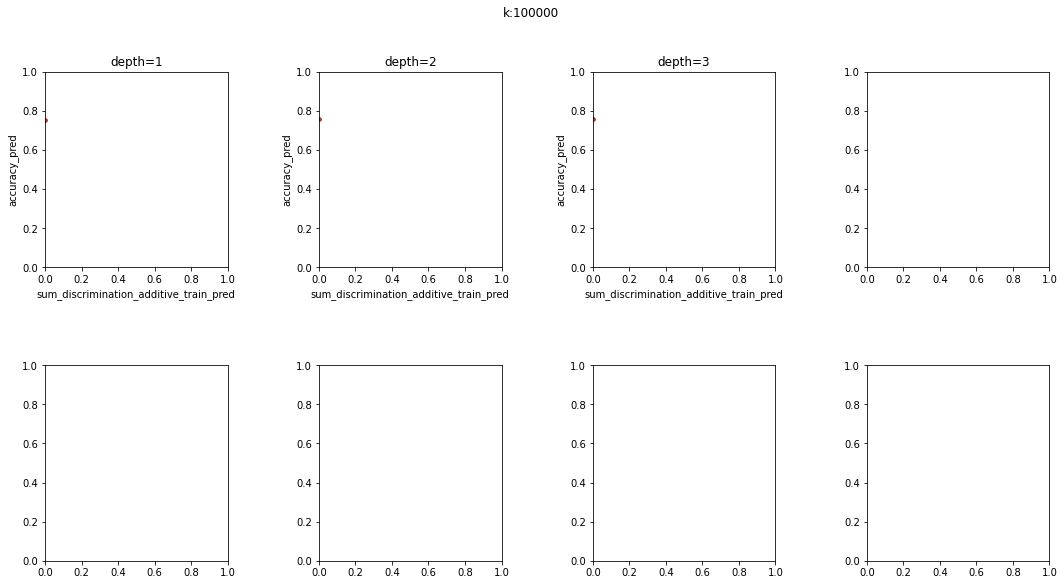

In [29]:
utils.plot_one_scatter_by_depth("sum_discrimination_additive_train_pred", "accuracy_pred", result, (0, 1), (0, 1))

<Figure size 648x432 with 0 Axes>

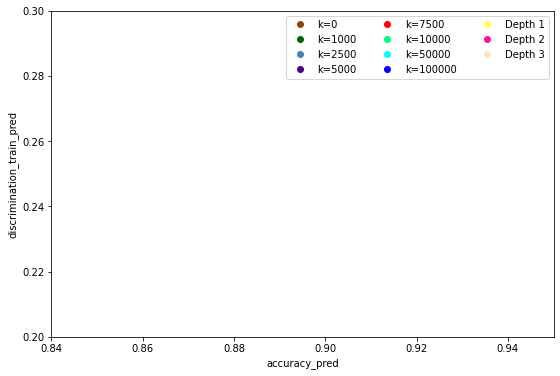

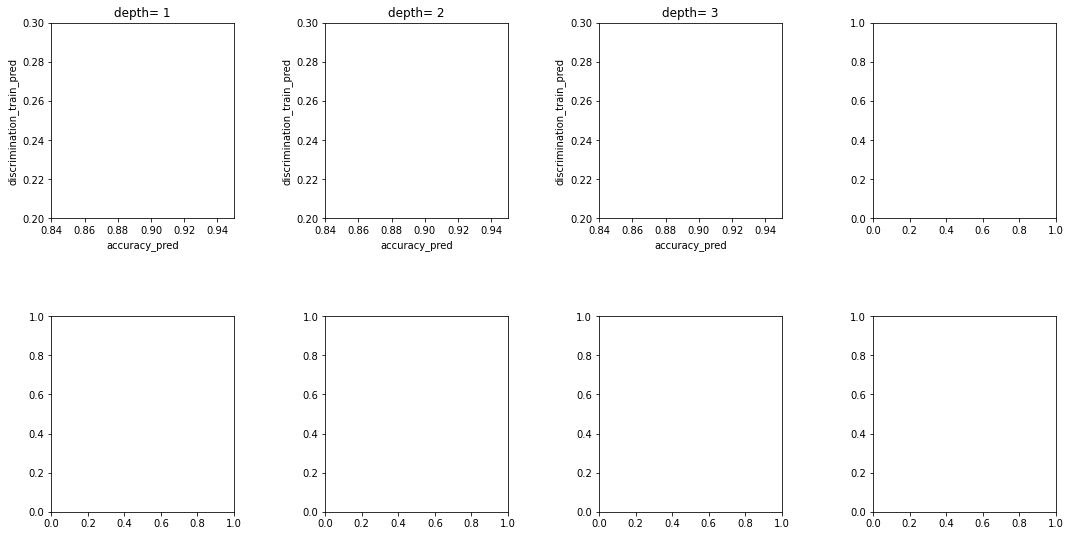

In [30]:
x_lim = (0.84, 0.95)
y_lim = (0.2, 0.3)
utils.plot_k_depth_mean("accuracy_pred", "discrimination_train_pred", result, x_lim, y_lim)
utils.plot_each_k_depth_mean("accuracy_pred", "discrimination_train_pred", result, x_lim, y_lim)

<Figure size 648x432 with 0 Axes>

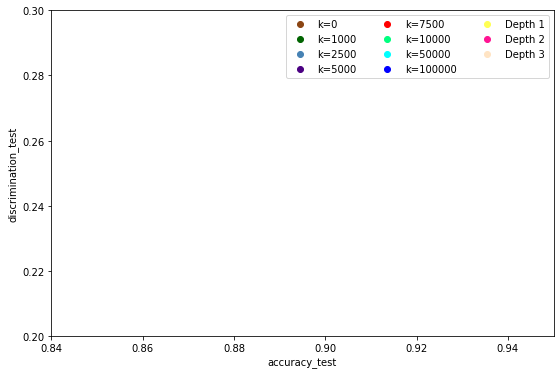

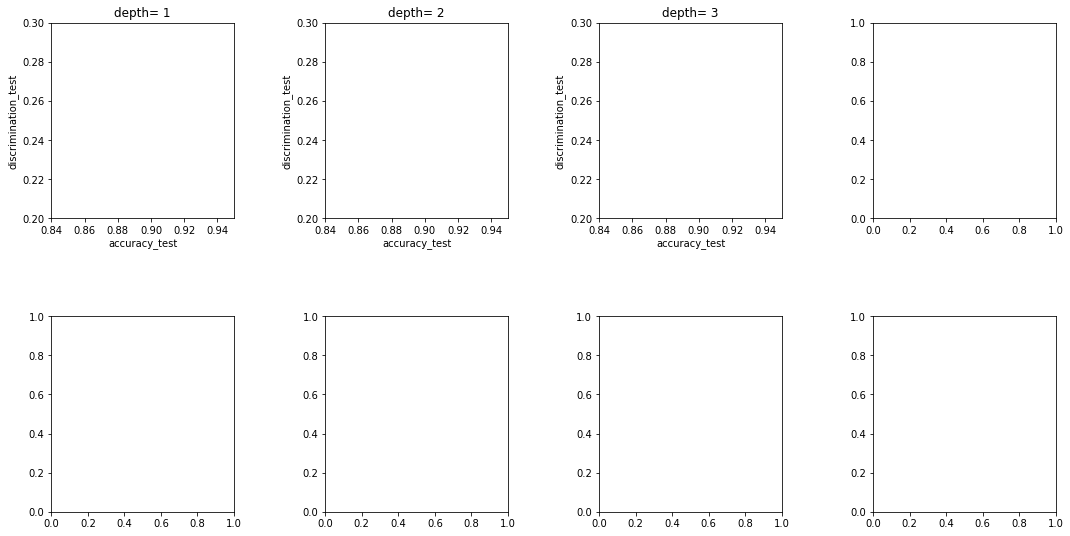

In [31]:
x_lim = (0.84, 0.95)
y_lim = (0.2, 0.3)
utils.plot_k_depth_mean("accuracy_test", "discrimination_test", result, x_lim, y_lim)
utils.plot_each_k_depth_mean("accuracy_test", "discrimination_test", result, x_lim, y_lim)

<Figure size 648x432 with 0 Axes>

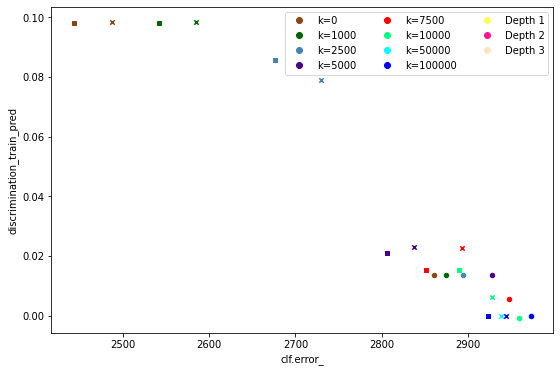

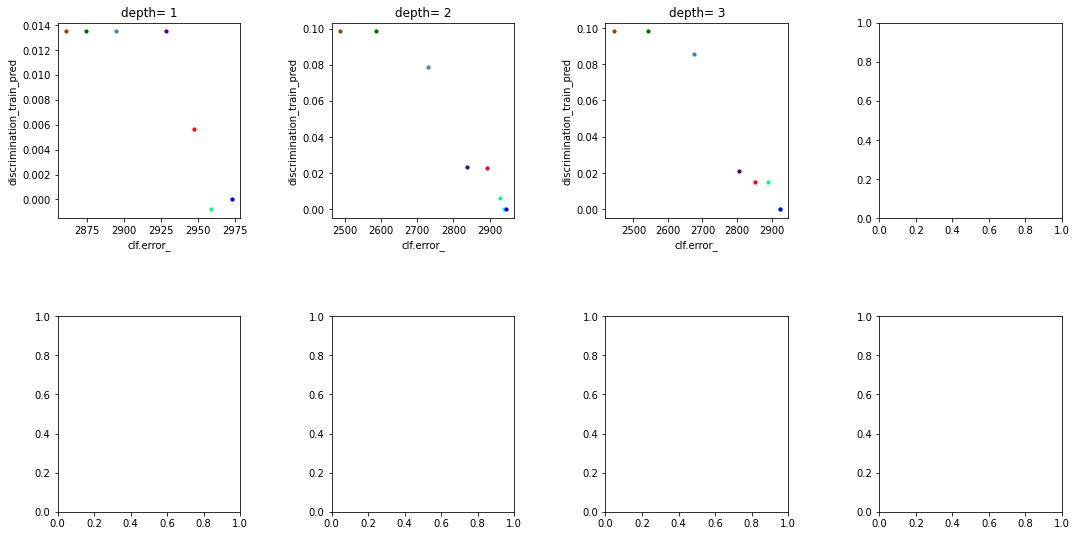

In [32]:
x_lim = None
y_lim = None
utils.plot_k_depth_mean("clf.error_", "discrimination_train_pred", result, x_lim, y_lim)
utils.plot_each_k_depth_mean("clf.error_", "discrimination_train_pred", result, x_lim, y_lim)

<Figure size 648x432 with 0 Axes>

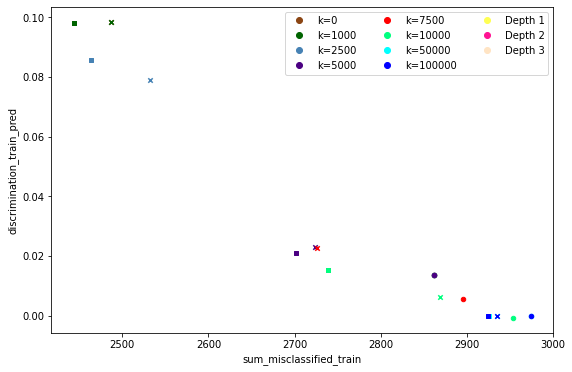

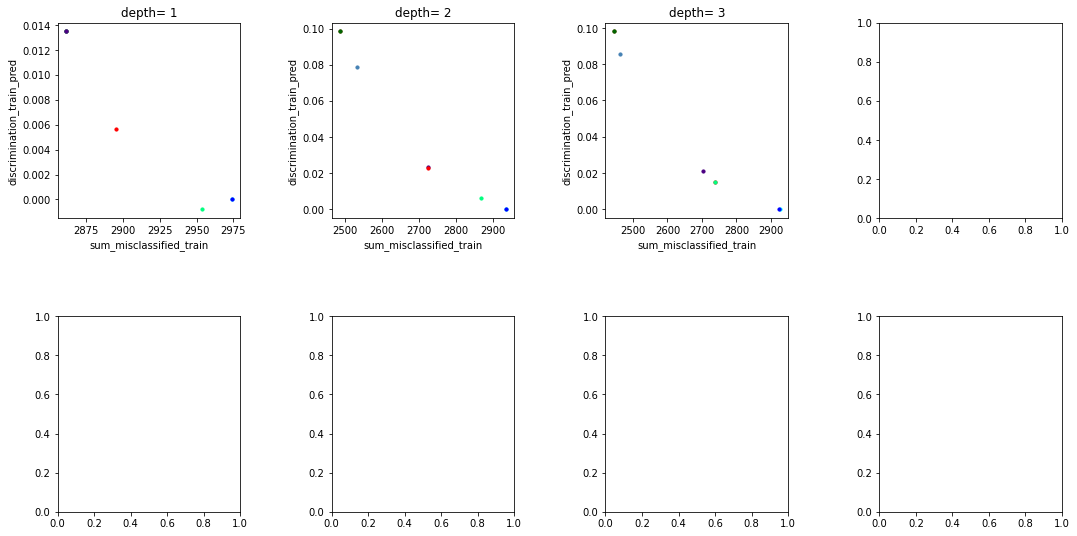

In [33]:
x_lim = None
y_lim = None
utils.plot_k_depth_mean("sum_misclassified_train", "discrimination_train_pred", result, x_lim, y_lim)
utils.plot_each_k_depth_mean("sum_misclassified_train", "discrimination_train_pred", result, x_lim, y_lim)

<Figure size 648x432 with 0 Axes>

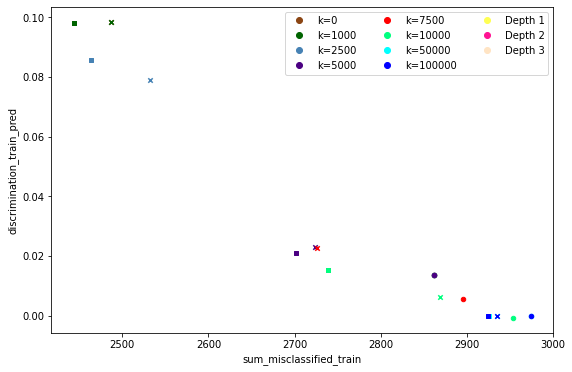

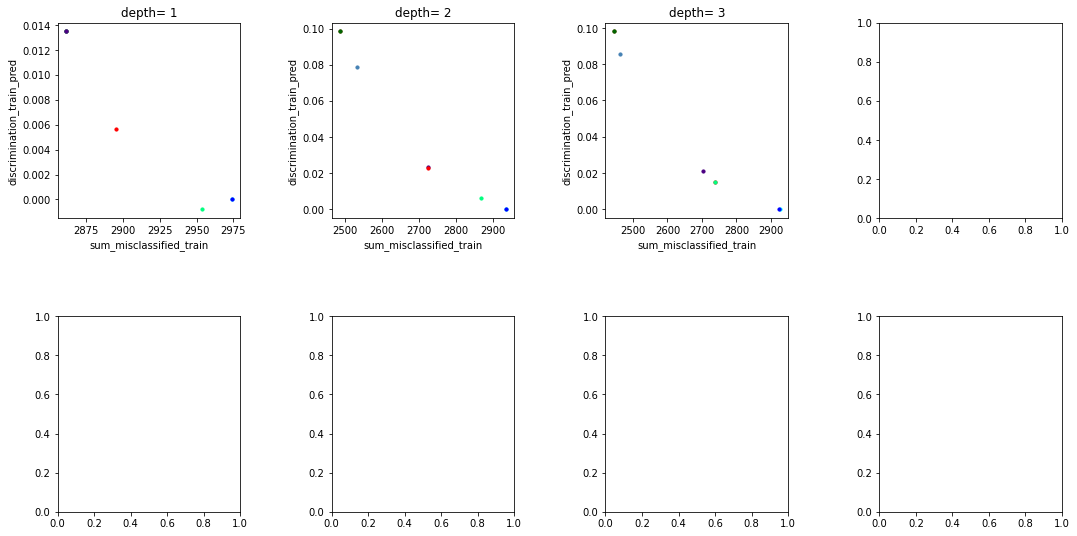

In [34]:
x_lim = None
y_lim = None
utils.plot_k_depth_mean("sum_misclassified_train", "discrimination_train_pred", result, x_lim, y_lim)
utils.plot_each_k_depth_mean("sum_misclassified_train", "discrimination_train_pred", result, x_lim, y_lim)

<Figure size 648x432 with 0 Axes>

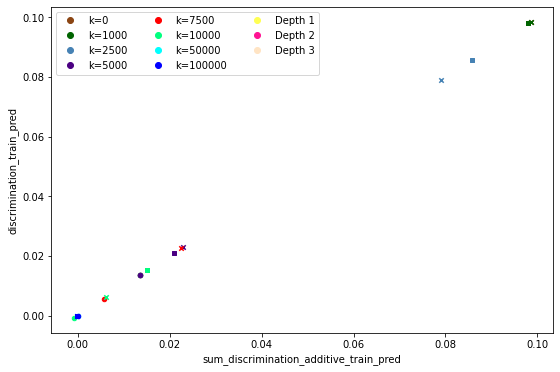

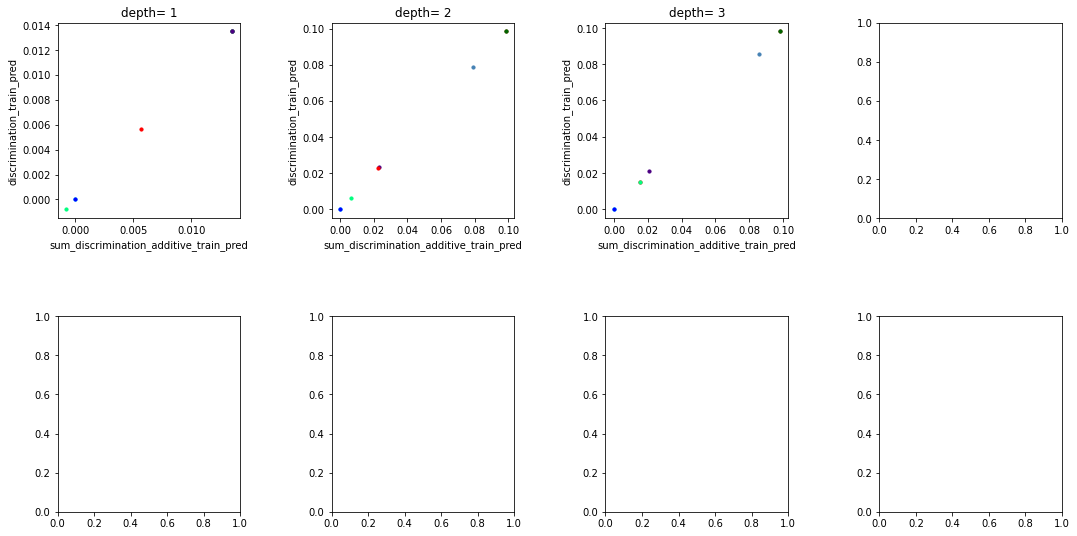

In [35]:
x_lim = None
y_lim = None
utils.plot_k_depth_mean("sum_discrimination_additive_train_pred", "discrimination_train_pred", result, x_lim, y_lim)
utils.plot_each_k_depth_mean("sum_discrimination_additive_train_pred", "discrimination_train_pred", result, x_lim, y_lim)

<Figure size 648x432 with 0 Axes>

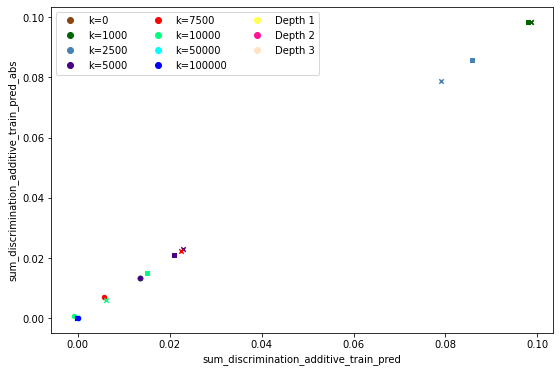

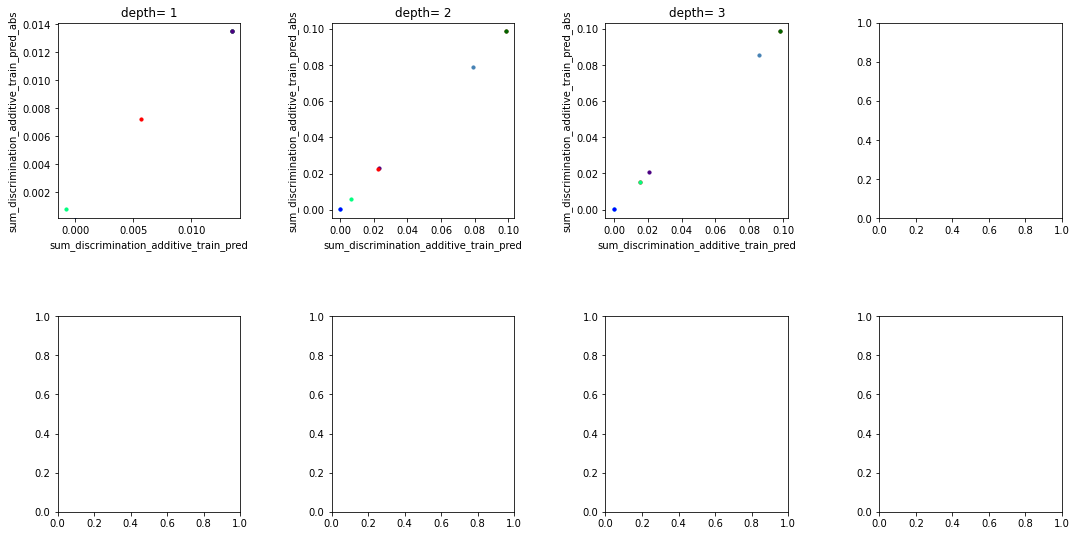

In [36]:
x_lim = None
y_lim = None
utils.plot_k_depth_mean("sum_discrimination_additive_train_pred", "sum_discrimination_additive_train_pred_abs", result, x_lim, y_lim)
utils.plot_each_k_depth_mean("sum_discrimination_additive_train_pred", "sum_discrimination_additive_train_pred_abs", result, x_lim, y_lim)